#                Projet de python for Data Analysis
## Kenny GUILLOUCHE et Clément GENOT

Le but du projet est d'analyser un jeu de données en profondeur et de créer de trouver le meilleur modèle par rapport à la problématiques posées. Le meilleur model sera ensuite disposé sous forme d'une API.

Voici le jeu de données qui nous a été attribué : https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#

Ce jeu de donnée concerne les vélos disposés un peu partout dans la ville en libre service (équivalent au velib à Paris)
Il contient les colonnes suivantes :

- Date : format year-month-day 
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius = température minimale annoncé
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours) = bool indiquant si la station de vélo était active

A noter que la colonne "Rented Bike count" est notre objectif à prédire cela correspond aux nombres de vélo loué à chaque heure d'une journée cela correspond donc à la résolution d'un problème de regression supervisé. 

# Analyse des données

In [1]:
#Lecture du dataset
import pandas as pd
dataset = pd.read_csv("SeoulBikeData.csv")

In [2]:
dataset.head(48)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
#la date est a transformer
#en année, jour,mois,jour_semaine, isweekend

In [4]:
#La date doit etre décomposé afin de pouvoir etre interpretable
dataset["Date"] = pd.to_datetime(dataset["Date"],dayfirst=True)
dataset["Year"] = dataset["Date"].apply(lambda x: x.year)
dataset["Month"] = dataset["Date"].apply(lambda x: x.month)
dataset["Day"] = dataset["Date"].apply(lambda x: x.day)

In [5]:
#Nous rajoutons lesjours de la semaine car les weekends ont peut etre une incidence sur les locations
#0 = lundi à 6=dimanche
dataset["DayOfWeek"] = dataset["Date"].dt.dayofweek

In [6]:
#Nous pensons aussi que le week end à peut-etre une incidence sur les vélos loués 
dataset["isWeekEnd"] = [True if int(x)>4 else False for x in dataset["DayOfWeek"]]

In [7]:
dataset.head(48)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,DayOfWeek,isWeekEnd
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,False


**Regardons l'impact des températures sur les locations de vélo**

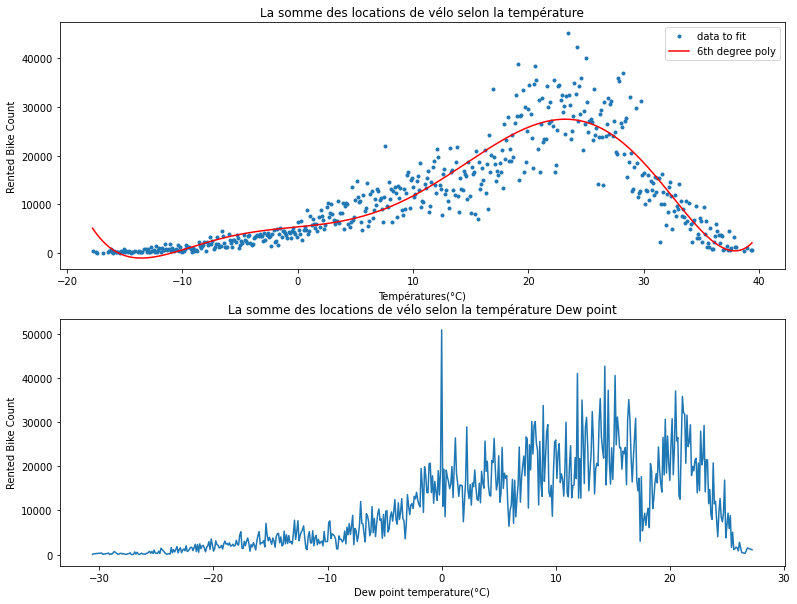

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2,figsize=(13,10))

data = dataset[["Temperature(°C)", "Rented Bike Count"]].groupby("Temperature(°C)").sum().reset_index()
data

x = data["Temperature(°C)"]
y = data["Rented Bike Count"]

z = np.polyfit(x, y, 6) 
p = np.poly1d(z)

xx = np.linspace(x.min(), x.max(), 1000)

ax1.set_xlabel('Températures(°C)')
ax1.set_ylabel('Rented Bike Count')
ax1.set_title("La somme des locations de vélo selon la température")
ax1.plot(x, y, '.', xx, p(xx),'-r')
ax1.legend(['data to fit', '6th degree poly'])

data = dataset[["Dew point temperature(°C)", "Rented Bike Count"]].groupby("Dew point temperature(°C)").sum().reset_index()
x2 = data["Dew point temperature(°C)"]
y2 = data["Rented Bike Count"]
ax2.set_title("La somme des locations de vélo selon la température Dew point")
ax2.set_xlabel('Dew point temperature(°C)')
ax2.set_ylabel('Rented Bike Count')

ax2.plot(x2, y2)

On remarque que la température à un fort impact sur les locations de vélo, en effet les températures plus douces amenent plus les gens à prendre le vélo pour aller au travail ou tout simplement pour se déplacer lors du trajet.

**Regardons l'impact des saisons sur les locations de vélo**

<BarContainer object of 4 artists>

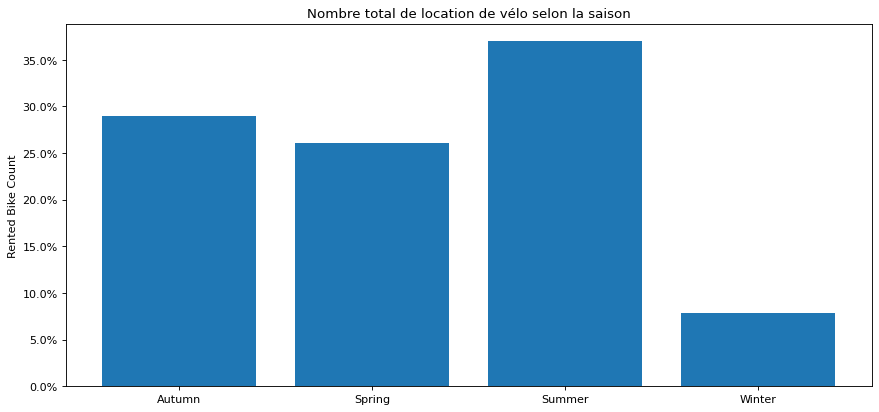

In [9]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')

season_sum = dataset[["Seasons", "Rented Bike Count"]].groupby("Seasons").sum().reset_index()
season_sum


total_rent_bike = season_sum["Rented Bike Count"].sum()
total_rent_bike
season_sum["Rented Bike Count"] = season_sum["Rented Bike Count"].apply(lambda x : (x/total_rent_bike)*100)
season_sum
axes = plt.gca()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Nombre total de location de vélo selon la saison")
plt.ylabel("Rented Bike Count")
plt.bar(season_sum["Seasons"], season_sum["Rented Bike Count"])

Pour faire écho au température, les saisons estivales sont plus propice à la location de vélo, en effet 37% des vélos sont loués durant l'été contre seulement 8% en hiver. Ces données vont permettre de créer notre modèle mais aussi peuvent indiquer des stratégies autres, par exemple si une compagne de maintenance est nécessaire, il est probablement plus judicieux de la faire en hiver car la demande sera moins forte.

**Regardons l'évolution des vélos loués en fonction de la date**

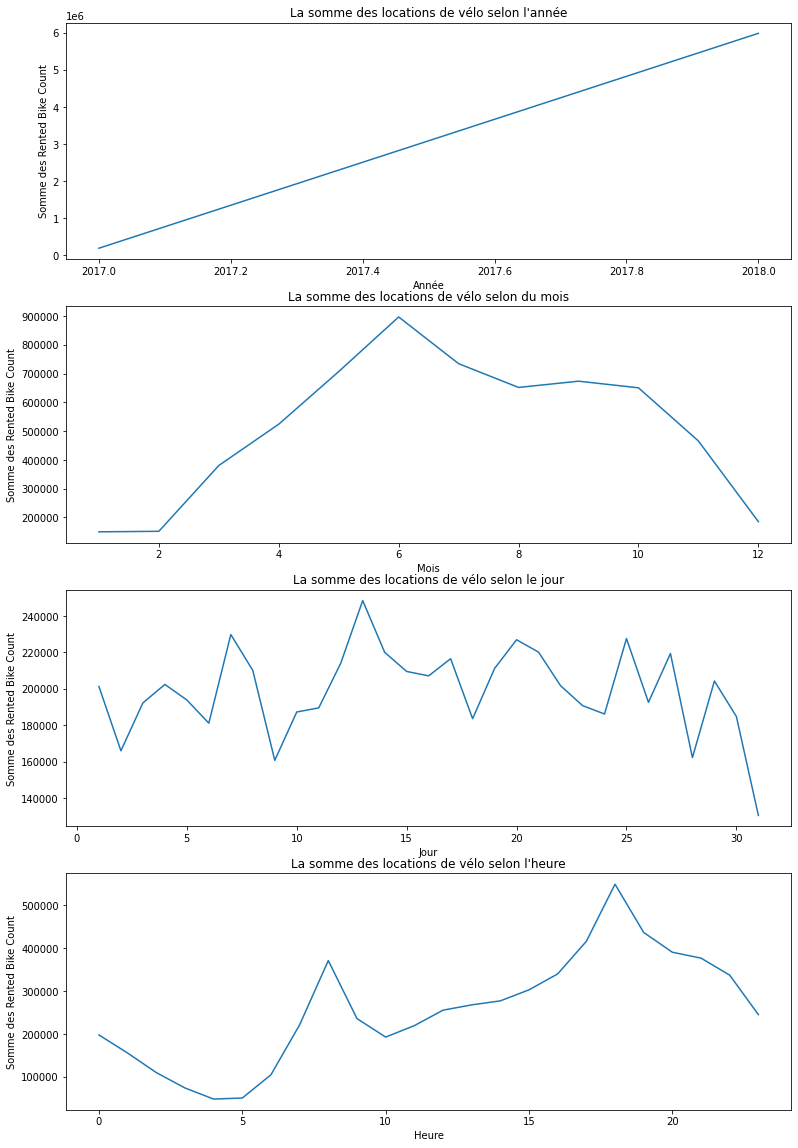

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(13,20))

#Année
year_sum = dataset[["Year", "Rented Bike Count"]].groupby("Year").sum().reset_index()
year_sum
ax1.set_title("La somme des locations de vélo selon l'année")
ax1.set_xlabel('Année')
ax1.set_ylabel('Somme des Rented Bike Count')

ax1.plot(year_sum["Year"], year_sum["Rented Bike Count"])

#Mois
month_sum = dataset[["Month", "Rented Bike Count"]].groupby("Month").sum().reset_index()
month_sum
ax2.set_title("La somme des locations de vélo selon du mois")
ax2.set_xlabel('Mois')
ax2.set_ylabel('Somme des Rented Bike Count')

ax2.plot(month_sum["Month"], month_sum["Rented Bike Count"])

#Jours
day_sum = dataset[["Day", "Rented Bike Count"]].groupby("Day").sum().reset_index()
day_sum
ax3.set_title("La somme des locations de vélo selon le jour")
ax3.set_xlabel('Jour')
ax3.set_ylabel('Somme des Rented Bike Count')

ax3.plot(day_sum["Day"], day_sum["Rented Bike Count"])

#Heures
hour_sum = dataset[["Hour", "Rented Bike Count"]].groupby("Hour").sum().reset_index()
hour_sum
ax4.set_title("La somme des locations de vélo selon l'heure")
ax4.set_xlabel('Heure')
ax4.set_ylabel('Somme des Rented Bike Count')

ax4.plot(hour_sum["Hour"], hour_sum["Rented Bike Count"])

Les graphiques ci-dessus sont très intéressant car ils montrent une certaine habitude des coréens. On peut notamment voir que nous avons des mois, des jours et des heures vraiment propice à la location de vélos. Cela doit probablement être lié aux horaires de travail, aux vacances scolaires ou d'autres facteurs tel que la température comme on l'a vu précedemment

**Regardons l'évolution des vélos  loués à partir du jour de la semaine**

<BarContainer object of 7 artists>

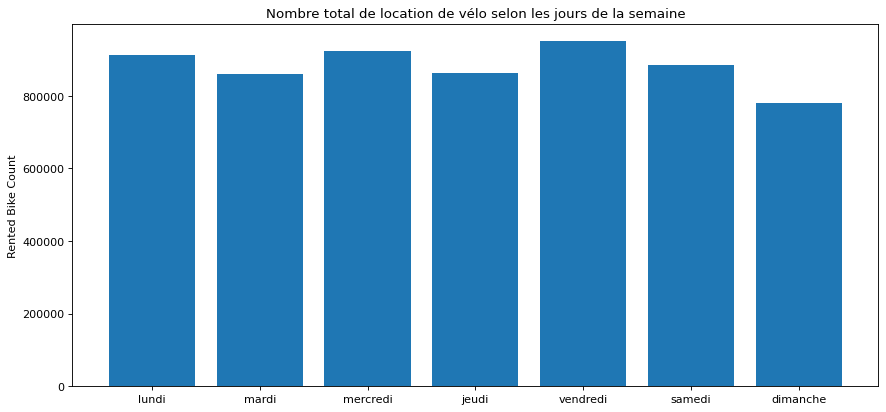

In [43]:
import matplotlib.ticker as mtick
figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')

day_sum = dataset[["DayOfWeek", "Rented Bike Count"]].groupby("DayOfWeek").sum().reset_index()
day_sum

plt.title("Nombre total de location de vélo selon les jours de la semaine")
plt.ylabel("Rented Bike Count")
lst_jour_semaine = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]
plt.bar(lst_jour_semaine, day_sum["Rented Bike Count"])

A première vue, le jour de la semaine n'a pas vraiment d'incidence sur le nombre de vélo loué. Cependant il s'agit d'une moyenne sur l'année. Essayons de voir mois par mois si cela change nos résultats:

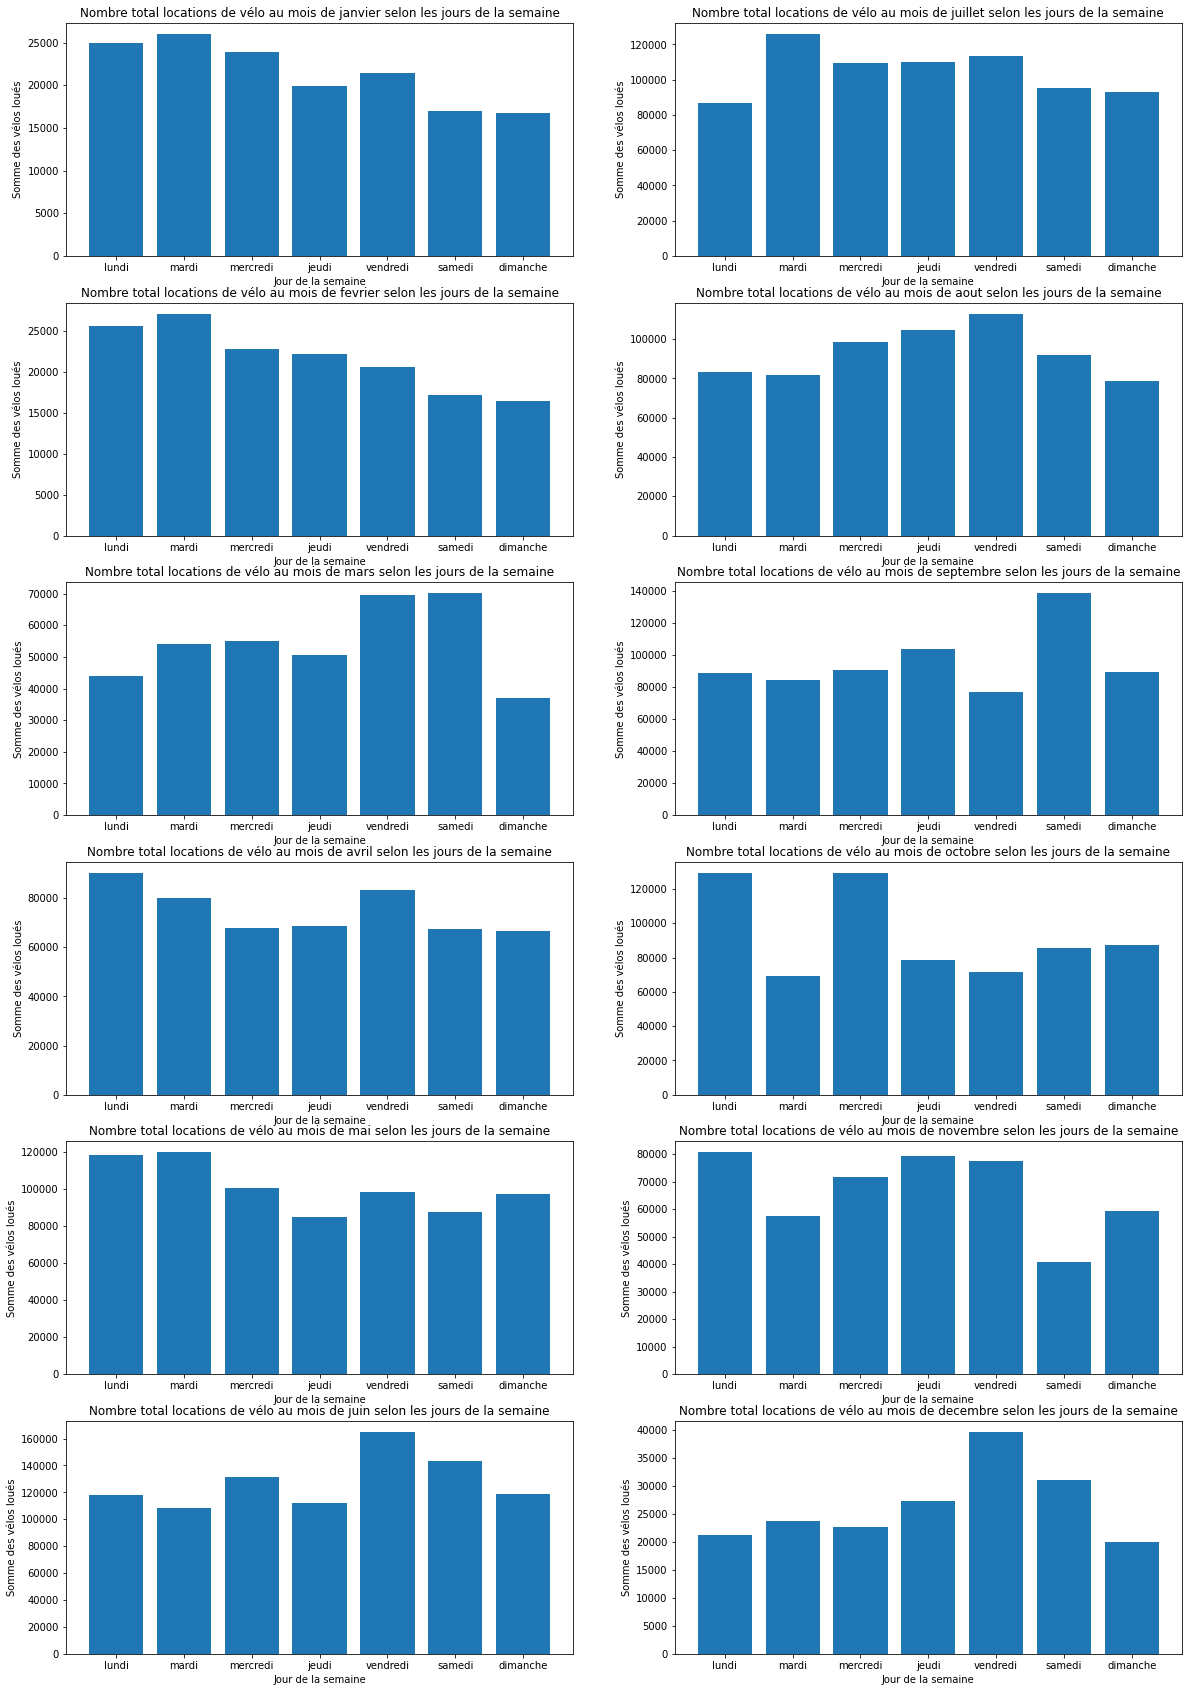

In [119]:
lst_jour_semaine = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]
lst_mois = ["janvier","fevrier","mars","avril","mai","juin","juillet","aout","septembre","octobre","novembre","decembre"]
fig, axs = plt.subplots(6,2,figsize=(20,30))
for i in range(1,13):
    day_sum = dataset[dataset["Month"]==i]
    day_sum = day_sum[["DayOfWeek", "Rented Bike Count"]].groupby("DayOfWeek").sum().reset_index()
    day_sum
    
    if i<7 :
        axs[i-1,0].set_title("Nombre total locations de vélo au mois de "+ lst_mois[i-1] +" selon les jours de la semaine")
        axs[i-1,0].set_xlabel('Jour de la semaine')
        axs[i-1,0].set_ylabel('Somme des vélos loués')
        axs[i-1,0].bar(lst_jour_semaine, day_sum["Rented Bike Count"])
    else:
        axs[i-7,1].set_title("Nombre total locations de vélo au mois de "+ lst_mois[i-1] +" selon les jours de la semaine")
        axs[i-7,1].set_xlabel('Jour de la semaine')
        axs[i-7,1].set_ylabel('Somme des vélos loués')
        axs[i-7,1].bar(lst_jour_semaine, day_sum["Rented Bike Count"])

Sous cette forme, on peut voir que le jour de la semaine influe sur le nombre de vélo loué, cela est plus marqué sur certains mois.

**Regardons l'évolution du nombre de vélos loués selon certains critère météorologique Humidity(%)	Wind speed (m/s)**

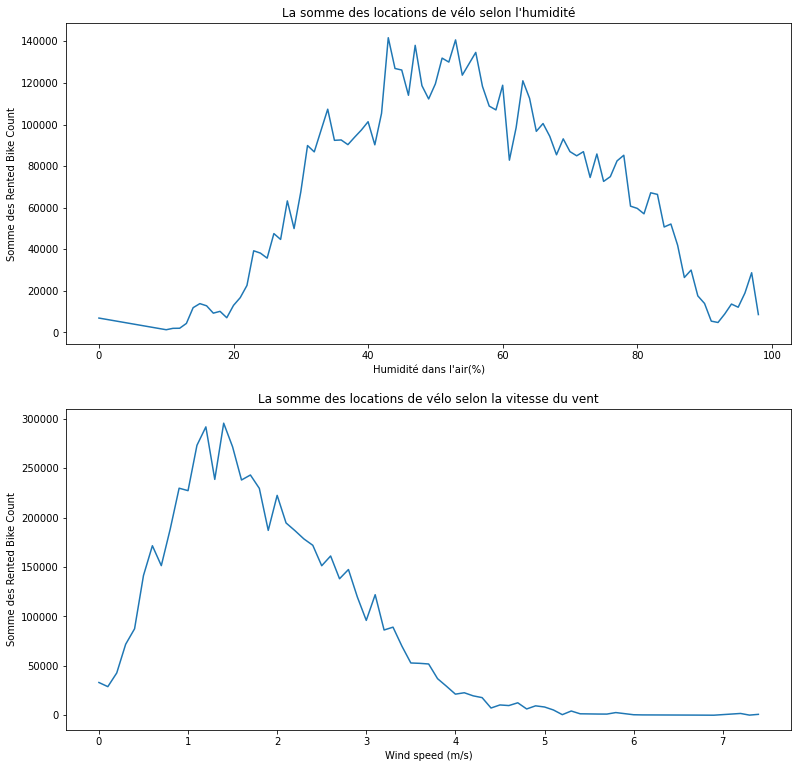

In [30]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(13,13))

#Humidité
humidity_sum = dataset[["Humidity(%)", "Rented Bike Count"]].groupby("Humidity(%)").sum().reset_index()
humidity_sum
ax1.set_title("La somme des locations de vélo selon l'humidité")
ax1.set_xlabel('Humidité dans l\'air(%)')
ax1.set_ylabel('Somme des Rented Bike Count')

ax1.plot(humidity_sum["Humidity(%)"], humidity_sum["Rented Bike Count"])

#WindSpeed
wind_speed_sum = dataset[["Wind speed (m/s)", "Rented Bike Count"]].groupby("Wind speed (m/s)").sum().reset_index()
wind_speed_sum
ax2.set_title("La somme des locations de vélo selon la vitesse du vent")
ax2.set_xlabel('Wind speed (m/s)')
ax2.set_ylabel('Somme des Rented Bike Count')

ax2.plot(wind_speed_sum["Wind speed (m/s)"], wind_speed_sum["Rented Bike Count"])

Le ven et l'humidté dans l'air on un impact sur les vélos loués cela est probablement du aussi au mois car avec un climat océanique, ils sont peut-etre souvent à des événements climatiques sur certaines périodes de l'année.

**Egalement nous avons l'impression que certaines colonnes ont un nombre très élevé de NA ou de 0. Vérifions notre presentiment** 

Le poucentage de valeur à 0 dans la colonne RainFall 93.97260273972603
Le poucentage de valeur à 0 dans la colonne SnowFall 94.94292237442923


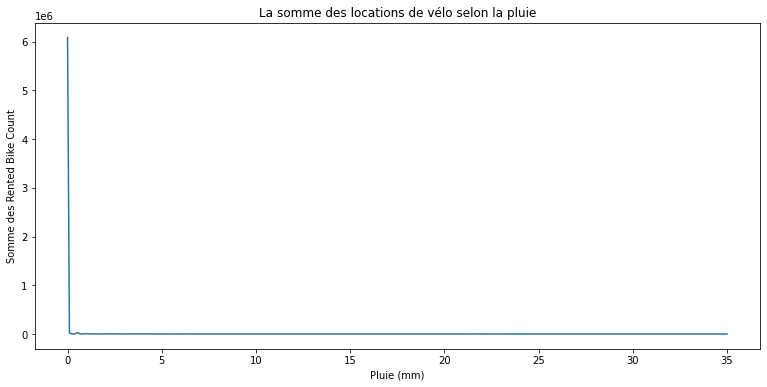

In [33]:
#Rainfall(mm)
nb_zero_rainfall = len(dataset[dataset["Rainfall(mm)"] == 0])
nb_ligne = len(dataset)
ratio_na_rainfall = (nb_zero_rainfall/nb_ligne) * 100
print("Le poucentage de valeur à 0 dans la colonne RainFall " + str(ratio_na_rainfall))

#Snowfall (cm)
nb_zero_snowfall = len(dataset[dataset["Snowfall (cm)"] == 0])
ratio_na_rainfall = (nb_zero_snowfall/nb_ligne) * 100
print("Le poucentage de valeur à 0 dans la colonne SnowFall " + str(ratio_na_rainfall))

fig, (ax1) = plt.subplots(1,figsize=(13,6))

#RainFall
rainfall_sum = dataset[["Rainfall(mm)", "Rented Bike Count"]].groupby("Rainfall(mm)").sum().reset_index()
rainfall_sum
ax1.set_title("La somme des locations de vélo selon la pluie")
ax1.set_xlabel('Pluie (mm)')
ax1.set_ylabel('Somme des Rented Bike Count')

ax1.plot(rainfall_sum["Rainfall(mm)"], rainfall_sum["Rented Bike Count"])

On peut voir que 95% du temps il ne pleut pas ou ne neige pas en corée du sud et que lorsqu'il pleut le nombre de vélo loué est casiment null

# Model et prediction

Maintenant que l'analyse des données est faite, nous allons réfléchir aux modèles à employer.
Il s'agit d'un problème de regression, nous allons donc employer les différents algorithmes associés à ce genre de problème.
Ainsi dans cette partie nous allons aborder les algorithmes suivants :

- Regression linéaire simple
- Regression polynomiale
- Random Forest
- LGB 
- XGBoost
- CatBoost

Pour déterminer lequel ce des algorithmes nous donnera les meilleurs résultats nous allons tout d'abord découper notre dataset en train et test afin d'évaluer notre modèle sur des données auxquels il n'a pas pu s'entrainer.

Ensuite au niveau de l'évaluation des modèles nous allons utiliser le R2 ET RMSE qui permettent de donner une indication de l'erreur de notre modèle. R2 est compris entre 0 et 1 , plus il est proche de 1 est plus notre algorithme est précis.
RMSE c'est l'inverse, plus il est faible et plus il signifie que l'erreur est faible et donc que notre algorithme est performant

Mais avant de commencer, modifions et séparons nos données pour les modèles.

## Transformation et séparation des données pour les modèles

Il faut s'avoir que les données en string ne sont pas interpretable tel quel par un algorithme, il faut les transformer soit en enumérations, soit en vecteur. Ici nous allons les transformer en enumérations :

In [12]:
#transformation des collonnes string en element interpretable par une regression lineaire
#vecteur, int, float, bool

#Transformons les saisons string en enumération sous forme de int
#0 : winter, 1:spring, 2 : summer, 3 : automn
mapping = {k: v for v, k in enumerate(dataset["Seasons"].unique())}
dataset['Seasons'] = dataset["Seasons"].map(mapping)

#Transformons string Functionning Day en boolean
dataset["Functioning Day"] = [True if x=="Yes" else False for x in dataset["Functioning Day"]]

#Transformons string Holiday en boolean
dataset["Holiday"] = [False if x=="No Holiday" else True for x in dataset["Holiday"]]

#On retire la Date car on l'a deja décomposé et les datetime ne sont pas interpretable par un model
#De plus on pourrait la transformer en timestamp et la considerer comme un id
dataset = dataset.drop('Date', 1)

Regardons ce que nous obtenons :

In [13]:
dataset.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,DayOfWeek,isWeekEnd
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,False,True,2017,12,1,4,False
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,False,True,2017,12,1,4,False


### Séparation des données en train et test

Le but est de séparer notre dataset en train et test afin de pouvoir évaluer la capacité de notre modèle à répondre à notre besoin.

In [14]:
from sklearn.model_selection import train_test_split
y = dataset.pop('Rented Bike Count')
X = dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
len(X_train) # return dataframe train

7008

In [16]:
len(X_test)

1752

## Regression linéaire simple

Le premier algorithme que nous allons utiliser est une regression linéaire simple. Cela consiste à essayer de résoudre l'équation y = a*X+b.

- y = le nombre de vélo loué par heure (à déterminer)
- x = les autres données de notre dataset
- a et b = coefficient à déterminer

In [17]:
#Regression simple
from sklearn.linear_model import LinearRegression

#création et entrainement du modèle
modeleReg=LinearRegression()
modeleReg.fit(X_train,y_train)

LinearRegression()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Prédiction des vélos loués sur nos données de test
y_test_predict = modeleReg.predict(X_test)

#Détermination de notre RMSE ET R2
rmse_reg_simple = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_reg_simple = r2_score(y_test, y_test_predict)

In [19]:
print("Nous avons comme RMSE : " + str(rmse_reg_simple) + " et comme R2 : " + str(r2_reg_simple))

Nous avons comme RMSE : 441.4404866217178 et comme R2 : 0.5322897806527519


Ce premier algorithme nous donne des résultat assez médiocre cela vient du fait qu'il a du mal à trouver une droite permettant de représenter les données. Essayons donc de l'améliorer en ne passant plus par une droite mais par un polynome de degré N.

## Regression polynomiale

Afin d'améliorer notre premier résultat, nous allons passer par des polynomes cela signifie que notre nouvelle formule est y = a*X + b*X + c*X.... + constante

- y = le nombre de vélo loué par heure (à déterminer)
- X = les autres données de notre dataset
- a,b,c...,constante = coefficient à déterminer

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Création d'un polynome de degré 2
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

#Création du modèle
model_rlp = LinearRegression()
model_rlp.fit(x_poly, y_train)

LinearRegression()

In [21]:
#Prédiction et évaluation du modèle
X_test_poly = polynomial_features.fit_transform(X_test)
y_test_predict = model_rlp.predict(X_test_poly)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

In [22]:
print("Nous avons comme RMSE : " + str(rmse) + " et comme R2 : " + str(r2))

Nous avons comme RMSE : 368.90348126876296 et comme R2 : 0.673368517040478


On peut déjà voir qu'avec un degré 2, nous obtenons déjà de meilleur résultat cependant, il faut déterminer le meilleur degré pour nos données. Egalement toute les donnnées ne sont pas utiles nous décidons de réduire le dataset pour obtenir de meilleur résultat.

In [23]:
X2_train = X_train[["Hour","Temperature(°C)","Humidity(%)","Month"]]
X2_test = X_test[["Hour","Temperature(°C)","Humidity(%)","Month"]]

def RegressionLineairePolynomiale(degree_polynome):
    polynomial_features= PolynomialFeatures(degree=degree_polynome)
    x_poly = polynomial_features.fit_transform(X2_train)
    X_test_poly = polynomial_features.fit_transform(X2_test)

    #Creation et entrainemet du modele
    model = LinearRegression()
    model.fit(x_poly, y_train)
    
    # Evaluation du testing set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    return r2,rmse
    
list_rmse=[]
list_r2 = []
for i in range(1,11):
    r2,rmse = RegressionLineairePolynomiale(i)
    list_r2.append(r2)
    list_rmse.append(rmse)

Affichons l'évolution de nos critères d'évaluation (RMSE et R2) en fonction du degré du polynome

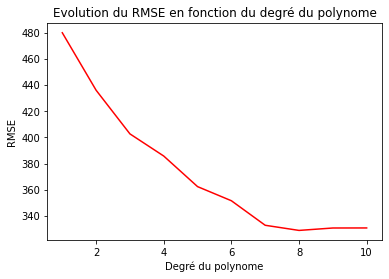

In [24]:
plt.plot(range(1, 11), list_rmse, color='r')
plt.title("Evolution du RMSE en fonction du degré du polynome")
plt.ylabel("RMSE")
plt.xlabel("Degré du polynome")
plt.show()

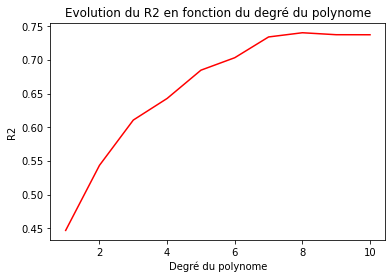

In [25]:
plt.plot(range(1, 11), list_r2, color='r')
plt.title("Evolution du R2 en fonction du degré du polynome")
plt.ylabel("R2")
plt.xlabel("Degré du polynome")
plt.show()

D'après les deux graphiques ci-dessus le meilleur degré est de 8.

In [26]:
rmse_reg_polynomiale = min(list_rmse)
r2_reg_polynomiale = max(list_r2)
print("Nous avons comme RMSE : " + str(rmse_reg_polynomiale) + " et comme R2 : " + str(r2_reg_polynomiale))

Nous avons comme RMSE : 328.9767937923207 et comme R2 : 0.740245510318013


## Random Forest

RandomForest : "L'algorithme des forêts d'arbres décisionnels effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.". Globalement on va construire différent arbre avec différent colonne de notre dataset que l'on va entrainé sur nos données et ensuite on va essayer de déterminer le meilleur arbre parmis tout ceux créé.

RandomForest a deux paramètres très important :
- max_depth = la profondeur des arbres
- n_estimators = le nombre d'arbres

Nous allons boucler différentes valeurs sur ces paramètres afin de trouver le meilleur modèle de RandomForest pour nos données

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

list_rmse =[]
list_r2 = []

#de profondeur 1 à 16
for i in range(1,17):
    regr = RandomForestRegressor(max_depth=i, random_state=42)
    regr.fit(X_train, y_train)
    y_test_predict = regr.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    list_rmse.append(rmse)
    list_r2.append(r2)

In [28]:
#+1 car une liste comme à 0 alors que notre boucle commence à 1
print("La profondeur des arbres optimales est : " + str(list_r2.index(max(list_r2))+1))

La profondeur des arbres optimales est : 16


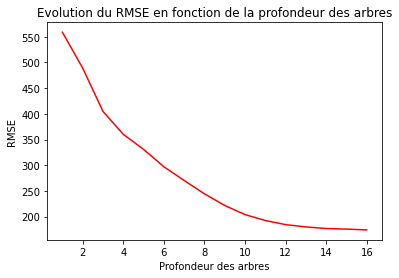

In [29]:
plt.plot(range(1, 17), list_rmse, color='r')
plt.title("Evolution du RMSE en fonction de la profondeur des arbres")
plt.ylabel("RMSE")
plt.xlabel("Profondeur des arbres")
plt.show()

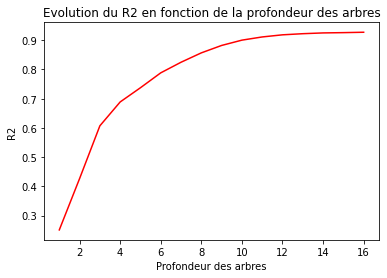

In [30]:
plt.plot(range(1, 17), list_r2, color='r')
plt.title("Evolution du R2 en fonction de la profondeur des arbres")
plt.ylabel("R2")
plt.xlabel("Profondeur des arbres")
plt.show()

In [31]:
rmse_svm = min(list_rmse)
r2_svm = max(list_r2)
print("Nous avons comme RMSE : " + str(rmse_svm) + " et comme R2 : " + str(r2_svm))

Nous avons comme RMSE : 174.14292104990295 et comme R2 : 0.9272146146846664


In [32]:
list_rmse =[]
list_r2 = []

#nombre d'arbre de 5 à 200
for i in range(1,41):
    nb_arbre = 5*i
    regr = RandomForestRegressor(max_depth=16, random_state=42,n_estimators=nb_arbre)
    regr.fit(X_train, y_train)
    y_test_predict = regr.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    list_rmse.append(rmse)
    list_r2.append(r2)

In [33]:
#+1 car une liste comme à 0 alors que notre boucle commence à 1
print("Le nombre d'arbre optimal est : " + str((list_r2.index(max(list_r2))+1)*5))

Le nombre d'arbre optimal est : 95


In [34]:
rmse_svm = min(list_rmse)
r2_svm = max(list_r2)
print("Nous avons comme RMSE : " + str(rmse_svm) + " et comme R2 : " + str(r2_svm))

Nous avons comme RMSE : 174.08320778866442 et comme R2 : 0.9272645220543231


Pour conclure, RandomForest donne de bien meilleur résultat que les techniques utilisés précedemment notamment grâce aux techniques de Bootstrap quel utilise. Afin d'encore améliorer nos résultats nous allons tester différents algorithmes de boosting.

## Gradient boosting

Le principe du gradient boosting ressemble au bagging vu précédemment avec randomForest. C'est à dire que l'on va créer plusieurs modèles que nous agrégéons ensuite pour n'avoir qu'un seul résultat. Pour chaque modèle créé nous allons calculer la différence entre ce que nous avons trouvé et l'attendu (on appelle ça aussi appelé le "fonction de perte"), à partir de celui-ci nous allons imputé des poids a chaques nodes des modèles. Puis on recommence encore et encore X fois, ce qui va permettre au fur et à mesure d'apprendre des erreurs passées.

## LGB

LGB est le premier algorithme de boosting que nous allons essayé, il est connu pour être "light" et donc efficace sur :
- la mémoire
- la rapidité d'entrainement
- la gestion d'une grande masse de données

In [35]:
#!pip install lightgbm

In [47]:
import lightgbm as lgb

#Creation en entrainement du modele
gbm = lgb.LGBMRegressor(objective='regression',num_leaves=100,learning_rate=0.2,n_estimators=3000,random_state=42)
gbm.fit(X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='l2_root',
    early_stopping_rounds=10)

[1]	valid_0's rmse: 543.443	valid_0's l2: 295331
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 458.869	valid_0's l2: 210560
[3]	valid_0's rmse: 392.794	valid_0's l2: 154287
[4]	valid_0's rmse: 343.607	valid_0's l2: 118066
[5]	valid_0's rmse: 303.011	valid_0's l2: 91815.8
[6]	valid_0's rmse: 272.855	valid_0's l2: 74449.7
[7]	valid_0's rmse: 251.217	valid_0's l2: 63110.2
[8]	valid_0's rmse: 232.065	valid_0's l2: 53854.2
[9]	valid_0's rmse: 218.392	valid_0's l2: 47695.2
[10]	valid_0's rmse: 208.434	valid_0's l2: 43444.8
[11]	valid_0's rmse: 199.595	valid_0's l2: 39838.1
[12]	valid_0's rmse: 193.947	valid_0's l2: 37615.4
[13]	valid_0's rmse: 187.276	valid_0's l2: 35072.1
[14]	valid_0's rmse: 181.683	valid_0's l2: 33008.7
[15]	valid_0's rmse: 178.33	valid_0's l2: 31801.4
[16]	valid_0's rmse: 175.639	valid_0's l2: 30849.2
[17]	valid_0's rmse: 173.341	valid_0's l2: 30047.2
[18]	valid_0's rmse: 170.192	valid_0's l2: 28965.2
[19]	valid_0's rmse: 168.668	valid_

LGBMRegressor(learning_rate=0.2, n_estimators=3000, num_leaves=100,
              objective='regression', random_state=42)

In [48]:
#Prediction et calcul du R2 et RMSE
y_test_predict = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
rmse_lgb = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_lgb = r2_score(y_test, y_test_predict)

In [49]:
rmse_lgb

147.77360407342013

In [50]:
r2_lgb

0.9475885389462484

Avec des paramètres mis par défaut on obtient déjà un meilleur résultat par rapport au randomForest, essayons de trouver les paramètres idéales :

In [51]:
#A la recherche des meilleurs paramètres
def LGB(learning_r,nb_estimators,nb_leaves):
    gbm = lgb.LGBMRegressor(objective='regression',num_leaves=nb_leaves,learning_rate=learning_r,n_estimators=nb_estimators,random_state=42, silent=True)
    gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l2_root',
        early_stopping_rounds=10)
    
    y_test_predict = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
    rmse= (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    return r2,rmse
    
#Regardons meilleur learning rate
list_rmse =[]
list_r2 = []
list_learning_rate = []
for i in range(1,101):
    learning_r= 0.01 *i
    list_learning_rate.append(learning_r)
    print("-"*10 +"learning rate = " + str(learning_r))
    r2,rmse = LGB(learning_r,3000,100)
    list_rmse.append(rmse)
    list_r2.append(r2)

----------learning rate = 0.01
[1]	valid_0's rmse: 640.261	valid_0's l2: 409934
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 635.118	valid_0's l2: 403375
[3]	valid_0's rmse: 629.982	valid_0's l2: 396877
[4]	valid_0's rmse: 624.88	valid_0's l2: 390476
[5]	valid_0's rmse: 619.921	valid_0's l2: 384302
[6]	valid_0's rmse: 614.912	valid_0's l2: 378117
[7]	valid_0's rmse: 610.05	valid_0's l2: 372161
[8]	valid_0's rmse: 605.185	valid_0's l2: 366248
[9]	valid_0's rmse: 600.375	valid_0's l2: 360450
[10]	valid_0's rmse: 595.712	valid_0's l2: 354873
[11]	valid_0's rmse: 591.011	valid_0's l2: 349294
[12]	valid_0's rmse: 586.346	valid_0's l2: 343801
[13]	valid_0's rmse: 581.793	valid_0's l2: 338483
[14]	valid_0's rmse: 577.29	valid_0's l2: 333264
[15]	valid_0's rmse: 572.849	valid_0's l2: 328156
[16]	valid_0's rmse: 568.353	valid_0's l2: 323026
[17]	valid_0's rmse: 564.03	valid_0's l2: 318130
[18]	valid_0's rmse: 559.493	valid_0's l2: 313033
[19]	valid_0's rmse: 

[163]	valid_0's rmse: 240.707	valid_0's l2: 57939.8
[164]	valid_0's rmse: 239.894	valid_0's l2: 57549.1
[165]	valid_0's rmse: 239.031	valid_0's l2: 57135.9
[166]	valid_0's rmse: 238.167	valid_0's l2: 56723.5
[167]	valid_0's rmse: 237.318	valid_0's l2: 56319.9
[168]	valid_0's rmse: 236.498	valid_0's l2: 55931.5
[169]	valid_0's rmse: 235.71	valid_0's l2: 55559
[170]	valid_0's rmse: 234.874	valid_0's l2: 55165.9
[171]	valid_0's rmse: 234.072	valid_0's l2: 54789.5
[172]	valid_0's rmse: 233.427	valid_0's l2: 54488.3
[173]	valid_0's rmse: 232.683	valid_0's l2: 54141.3
[174]	valid_0's rmse: 231.863	valid_0's l2: 53760.4
[175]	valid_0's rmse: 231.123	valid_0's l2: 53417.7
[176]	valid_0's rmse: 230.397	valid_0's l2: 53082.9
[177]	valid_0's rmse: 229.684	valid_0's l2: 52754.6
[178]	valid_0's rmse: 229.002	valid_0's l2: 52442.1
[179]	valid_0's rmse: 228.313	valid_0's l2: 52126.9
[180]	valid_0's rmse: 227.63	valid_0's l2: 51815.6
[181]	valid_0's rmse: 226.952	valid_0's l2: 51507.4
[182]	valid_0's 

[346]	valid_0's rmse: 172.144	valid_0's l2: 29633.6
[347]	valid_0's rmse: 172.013	valid_0's l2: 29588.5
[348]	valid_0's rmse: 171.835	valid_0's l2: 29527.4
[349]	valid_0's rmse: 171.66	valid_0's l2: 29467.1
[350]	valid_0's rmse: 171.548	valid_0's l2: 29428.7
[351]	valid_0's rmse: 171.446	valid_0's l2: 29393.6
[352]	valid_0's rmse: 171.337	valid_0's l2: 29356.3
[353]	valid_0's rmse: 171.167	valid_0's l2: 29298.3
[354]	valid_0's rmse: 171.064	valid_0's l2: 29262.8
[355]	valid_0's rmse: 170.953	valid_0's l2: 29225.1
[356]	valid_0's rmse: 170.806	valid_0's l2: 29174.5
[357]	valid_0's rmse: 170.638	valid_0's l2: 29117.2
[358]	valid_0's rmse: 170.486	valid_0's l2: 29065.4
[359]	valid_0's rmse: 170.311	valid_0's l2: 29005.8
[360]	valid_0's rmse: 170.163	valid_0's l2: 28955.4
[361]	valid_0's rmse: 170.032	valid_0's l2: 28910.9
[362]	valid_0's rmse: 169.922	valid_0's l2: 28873.6
[363]	valid_0's rmse: 169.754	valid_0's l2: 28816.4
[364]	valid_0's rmse: 169.618	valid_0's l2: 28770.2
[365]	valid_0

[520]	valid_0's rmse: 155.646	valid_0's l2: 24225.8
[521]	valid_0's rmse: 155.591	valid_0's l2: 24208.4
[522]	valid_0's rmse: 155.529	valid_0's l2: 24189.3
[523]	valid_0's rmse: 155.473	valid_0's l2: 24171.9
[524]	valid_0's rmse: 155.423	valid_0's l2: 24156.3
[525]	valid_0's rmse: 155.368	valid_0's l2: 24139.1
[526]	valid_0's rmse: 155.319	valid_0's l2: 24124.1
[527]	valid_0's rmse: 155.233	valid_0's l2: 24097.2
[528]	valid_0's rmse: 155.152	valid_0's l2: 24072.2
[529]	valid_0's rmse: 155.1	valid_0's l2: 24056
[530]	valid_0's rmse: 155.016	valid_0's l2: 24029.9
[531]	valid_0's rmse: 154.966	valid_0's l2: 24014.5
[532]	valid_0's rmse: 154.888	valid_0's l2: 23990.2
[533]	valid_0's rmse: 154.817	valid_0's l2: 23968.3
[534]	valid_0's rmse: 154.762	valid_0's l2: 23951.4
[535]	valid_0's rmse: 154.694	valid_0's l2: 23930.4
[536]	valid_0's rmse: 154.656	valid_0's l2: 23918.4
[537]	valid_0's rmse: 154.629	valid_0's l2: 23910.2
[538]	valid_0's rmse: 154.578	valid_0's l2: 23894.3
[539]	valid_0's 

[723]	valid_0's rmse: 148.379	valid_0's l2: 22016.3
[724]	valid_0's rmse: 148.348	valid_0's l2: 22007.2
[725]	valid_0's rmse: 148.323	valid_0's l2: 21999.7
[726]	valid_0's rmse: 148.286	valid_0's l2: 21988.9
[727]	valid_0's rmse: 148.279	valid_0's l2: 21986.7
[728]	valid_0's rmse: 148.275	valid_0's l2: 21985.3
[729]	valid_0's rmse: 148.261	valid_0's l2: 21981.3
[730]	valid_0's rmse: 148.245	valid_0's l2: 21976.6
[731]	valid_0's rmse: 148.215	valid_0's l2: 21967.7
[732]	valid_0's rmse: 148.187	valid_0's l2: 21959.4
[733]	valid_0's rmse: 148.183	valid_0's l2: 21958.1
[734]	valid_0's rmse: 148.17	valid_0's l2: 21954.3
[735]	valid_0's rmse: 148.157	valid_0's l2: 21950.5
[736]	valid_0's rmse: 148.145	valid_0's l2: 21947.1
[737]	valid_0's rmse: 148.142	valid_0's l2: 21946
[738]	valid_0's rmse: 148.124	valid_0's l2: 21940.7
[739]	valid_0's rmse: 148.113	valid_0's l2: 21937.5
[740]	valid_0's rmse: 148.105	valid_0's l2: 21935
[741]	valid_0's rmse: 148.082	valid_0's l2: 21928.3
[742]	valid_0's r

[884]	valid_0's rmse: 145.705	valid_0's l2: 21229.9
[885]	valid_0's rmse: 145.689	valid_0's l2: 21225.2
[886]	valid_0's rmse: 145.679	valid_0's l2: 21222.3
[887]	valid_0's rmse: 145.674	valid_0's l2: 21220.9
[888]	valid_0's rmse: 145.652	valid_0's l2: 21214.5
[889]	valid_0's rmse: 145.648	valid_0's l2: 21213.3
[890]	valid_0's rmse: 145.642	valid_0's l2: 21211.6
[891]	valid_0's rmse: 145.633	valid_0's l2: 21208.9
[892]	valid_0's rmse: 145.626	valid_0's l2: 21206.9
[893]	valid_0's rmse: 145.626	valid_0's l2: 21206.9
[894]	valid_0's rmse: 145.611	valid_0's l2: 21202.4
[895]	valid_0's rmse: 145.617	valid_0's l2: 21204.4
[896]	valid_0's rmse: 145.605	valid_0's l2: 21200.7
[897]	valid_0's rmse: 145.589	valid_0's l2: 21196.3
[898]	valid_0's rmse: 145.578	valid_0's l2: 21192.9
[899]	valid_0's rmse: 145.574	valid_0's l2: 21191.8
[900]	valid_0's rmse: 145.58	valid_0's l2: 21193.5
[901]	valid_0's rmse: 145.568	valid_0's l2: 21190
[902]	valid_0's rmse: 145.576	valid_0's l2: 21192.3
[903]	valid_0's

[1070]	valid_0's rmse: 144.085	valid_0's l2: 20760.4
[1071]	valid_0's rmse: 144.071	valid_0's l2: 20756.5
[1072]	valid_0's rmse: 144.064	valid_0's l2: 20754.3
[1073]	valid_0's rmse: 144.05	valid_0's l2: 20750.3
[1074]	valid_0's rmse: 144.046	valid_0's l2: 20749.1
[1075]	valid_0's rmse: 144.043	valid_0's l2: 20748.4
[1076]	valid_0's rmse: 144.034	valid_0's l2: 20745.7
[1077]	valid_0's rmse: 144.032	valid_0's l2: 20745.1
[1078]	valid_0's rmse: 144.02	valid_0's l2: 20741.9
[1079]	valid_0's rmse: 144.014	valid_0's l2: 20740.1
[1080]	valid_0's rmse: 143.999	valid_0's l2: 20735.8
[1081]	valid_0's rmse: 143.995	valid_0's l2: 20734.6
[1082]	valid_0's rmse: 143.985	valid_0's l2: 20731.8
[1083]	valid_0's rmse: 143.973	valid_0's l2: 20728.2
[1084]	valid_0's rmse: 143.961	valid_0's l2: 20724.8
[1085]	valid_0's rmse: 143.962	valid_0's l2: 20725.1
[1086]	valid_0's rmse: 143.954	valid_0's l2: 20722.7
[1087]	valid_0's rmse: 143.949	valid_0's l2: 20721.4
[1088]	valid_0's rmse: 143.952	valid_0's l2: 207

[1259]	valid_0's rmse: 142.889	valid_0's l2: 20417.4
[1260]	valid_0's rmse: 142.882	valid_0's l2: 20415.3
[1261]	valid_0's rmse: 142.877	valid_0's l2: 20413.8
[1262]	valid_0's rmse: 142.871	valid_0's l2: 20412.1
[1263]	valid_0's rmse: 142.865	valid_0's l2: 20410.5
[1264]	valid_0's rmse: 142.857	valid_0's l2: 20408.2
[1265]	valid_0's rmse: 142.849	valid_0's l2: 20405.7
[1266]	valid_0's rmse: 142.848	valid_0's l2: 20405.6
[1267]	valid_0's rmse: 142.848	valid_0's l2: 20405.5
[1268]	valid_0's rmse: 142.843	valid_0's l2: 20404.2
[1269]	valid_0's rmse: 142.843	valid_0's l2: 20404
[1270]	valid_0's rmse: 142.826	valid_0's l2: 20399.3
[1271]	valid_0's rmse: 142.818	valid_0's l2: 20397
[1272]	valid_0's rmse: 142.804	valid_0's l2: 20393
[1273]	valid_0's rmse: 142.802	valid_0's l2: 20392.5
[1274]	valid_0's rmse: 142.793	valid_0's l2: 20389.7
[1275]	valid_0's rmse: 142.785	valid_0's l2: 20387.4
[1276]	valid_0's rmse: 142.777	valid_0's l2: 20385.4
[1277]	valid_0's rmse: 142.778	valid_0's l2: 20385.5

[1450]	valid_0's rmse: 141.96	valid_0's l2: 20152.6
[1451]	valid_0's rmse: 141.954	valid_0's l2: 20151
[1452]	valid_0's rmse: 141.954	valid_0's l2: 20150.9
[1453]	valid_0's rmse: 141.948	valid_0's l2: 20149.2
[1454]	valid_0's rmse: 141.94	valid_0's l2: 20146.8
[1455]	valid_0's rmse: 141.939	valid_0's l2: 20146.7
[1456]	valid_0's rmse: 141.938	valid_0's l2: 20146.3
[1457]	valid_0's rmse: 141.929	valid_0's l2: 20143.7
[1458]	valid_0's rmse: 141.922	valid_0's l2: 20141.7
[1459]	valid_0's rmse: 141.92	valid_0's l2: 20141.3
[1460]	valid_0's rmse: 141.911	valid_0's l2: 20138.8
[1461]	valid_0's rmse: 141.904	valid_0's l2: 20136.6
[1462]	valid_0's rmse: 141.901	valid_0's l2: 20135.8
[1463]	valid_0's rmse: 141.907	valid_0's l2: 20137.5
[1464]	valid_0's rmse: 141.905	valid_0's l2: 20136.9
[1465]	valid_0's rmse: 141.901	valid_0's l2: 20135.9
[1466]	valid_0's rmse: 141.901	valid_0's l2: 20135.9
[1467]	valid_0's rmse: 141.898	valid_0's l2: 20135.1
[1468]	valid_0's rmse: 141.895	valid_0's l2: 20134.

----------learning rate = 0.02
[1]	valid_0's rmse: 635.051	valid_0's l2: 403290
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 624.794	valid_0's l2: 390368
[3]	valid_0's rmse: 614.791	valid_0's l2: 377968
[4]	valid_0's rmse: 604.899	valid_0's l2: 365903
[5]	valid_0's rmse: 595.293	valid_0's l2: 354374
[6]	valid_0's rmse: 586.095	valid_0's l2: 343508
[7]	valid_0's rmse: 576.897	valid_0's l2: 332811
[8]	valid_0's rmse: 568.093	valid_0's l2: 322730
[9]	valid_0's rmse: 558.923	valid_0's l2: 312395
[10]	valid_0's rmse: 550.252	valid_0's l2: 302777
[11]	valid_0's rmse: 541.819	valid_0's l2: 293567
[12]	valid_0's rmse: 533.261	valid_0's l2: 284367
[13]	valid_0's rmse: 525.065	valid_0's l2: 275694
[14]	valid_0's rmse: 517.035	valid_0's l2: 267326
[15]	valid_0's rmse: 509.246	valid_0's l2: 259332
[16]	valid_0's rmse: 501.797	valid_0's l2: 251800
[17]	valid_0's rmse: 494.149	valid_0's l2: 244183
[18]	valid_0's rmse: 487.028	valid_0's l2: 237196
[19]	valid_0's rm

[169]	valid_0's rmse: 175.504	valid_0's l2: 30801.6
[170]	valid_0's rmse: 175.11	valid_0's l2: 30663.6
[171]	valid_0's rmse: 174.864	valid_0's l2: 30577.3
[172]	valid_0's rmse: 174.648	valid_0's l2: 30501.9
[173]	valid_0's rmse: 174.272	valid_0's l2: 30370.9
[174]	valid_0's rmse: 173.883	valid_0's l2: 30235.2
[175]	valid_0's rmse: 173.672	valid_0's l2: 30162.1
[176]	valid_0's rmse: 173.319	valid_0's l2: 30039.6
[177]	valid_0's rmse: 172.92	valid_0's l2: 29901.5
[178]	valid_0's rmse: 172.695	valid_0's l2: 29823.6
[179]	valid_0's rmse: 172.371	valid_0's l2: 29711.6
[180]	valid_0's rmse: 172.12	valid_0's l2: 29625.2
[181]	valid_0's rmse: 171.834	valid_0's l2: 29526.8
[182]	valid_0's rmse: 171.458	valid_0's l2: 29397.7
[183]	valid_0's rmse: 171.179	valid_0's l2: 29302.1
[184]	valid_0's rmse: 170.94	valid_0's l2: 29220.6
[185]	valid_0's rmse: 170.657	valid_0's l2: 29123.9
[186]	valid_0's rmse: 170.432	valid_0's l2: 29047
[187]	valid_0's rmse: 170.162	valid_0's l2: 28955.1
[188]	valid_0's rm

[371]	valid_0's rmse: 149.238	valid_0's l2: 22272
[372]	valid_0's rmse: 149.242	valid_0's l2: 22273.3
[373]	valid_0's rmse: 149.217	valid_0's l2: 22265.6
[374]	valid_0's rmse: 149.175	valid_0's l2: 22253.3
[375]	valid_0's rmse: 149.121	valid_0's l2: 22237.1
[376]	valid_0's rmse: 149.088	valid_0's l2: 22227.3
[377]	valid_0's rmse: 149.031	valid_0's l2: 22210.3
[378]	valid_0's rmse: 149.017	valid_0's l2: 22205.9
[379]	valid_0's rmse: 148.969	valid_0's l2: 22191.8
[380]	valid_0's rmse: 148.936	valid_0's l2: 22182
[381]	valid_0's rmse: 148.915	valid_0's l2: 22175.6
[382]	valid_0's rmse: 148.86	valid_0's l2: 22159.3
[383]	valid_0's rmse: 148.845	valid_0's l2: 22154.9
[384]	valid_0's rmse: 148.827	valid_0's l2: 22149.6
[385]	valid_0's rmse: 148.806	valid_0's l2: 22143.1
[386]	valid_0's rmse: 148.791	valid_0's l2: 22138.8
[387]	valid_0's rmse: 148.773	valid_0's l2: 22133.5
[388]	valid_0's rmse: 148.745	valid_0's l2: 22125
[389]	valid_0's rmse: 148.718	valid_0's l2: 22117
[390]	valid_0's rmse:

[540]	valid_0's rmse: 145.86	valid_0's l2: 21275.1
[541]	valid_0's rmse: 145.833	valid_0's l2: 21267.3
[542]	valid_0's rmse: 145.819	valid_0's l2: 21263.1
[543]	valid_0's rmse: 145.778	valid_0's l2: 21251.4
[544]	valid_0's rmse: 145.767	valid_0's l2: 21247.9
[545]	valid_0's rmse: 145.73	valid_0's l2: 21237.3
[546]	valid_0's rmse: 145.71	valid_0's l2: 21231.4
[547]	valid_0's rmse: 145.687	valid_0's l2: 21224.6
[548]	valid_0's rmse: 145.67	valid_0's l2: 21219.7
[549]	valid_0's rmse: 145.627	valid_0's l2: 21207.2
[550]	valid_0's rmse: 145.598	valid_0's l2: 21198.9
[551]	valid_0's rmse: 145.58	valid_0's l2: 21193.6
[552]	valid_0's rmse: 145.568	valid_0's l2: 21190.2
[553]	valid_0's rmse: 145.527	valid_0's l2: 21178
[554]	valid_0's rmse: 145.504	valid_0's l2: 21171.5
[555]	valid_0's rmse: 145.5	valid_0's l2: 21170.3
[556]	valid_0's rmse: 145.459	valid_0's l2: 21158.4
[557]	valid_0's rmse: 145.442	valid_0's l2: 21153.4
[558]	valid_0's rmse: 145.446	valid_0's l2: 21154.6
[559]	valid_0's rmse:

[701]	valid_0's rmse: 144.133	valid_0's l2: 20774.3
[702]	valid_0's rmse: 144.129	valid_0's l2: 20773.3
[703]	valid_0's rmse: 144.11	valid_0's l2: 20767.6
[704]	valid_0's rmse: 144.104	valid_0's l2: 20765.8
[705]	valid_0's rmse: 144.086	valid_0's l2: 20760.7
[706]	valid_0's rmse: 144.084	valid_0's l2: 20760.1
[707]	valid_0's rmse: 144.086	valid_0's l2: 20760.9
[708]	valid_0's rmse: 144.075	valid_0's l2: 20757.7
[709]	valid_0's rmse: 144.074	valid_0's l2: 20757.4
[710]	valid_0's rmse: 144.062	valid_0's l2: 20753.8
[711]	valid_0's rmse: 144.061	valid_0's l2: 20753.6
[712]	valid_0's rmse: 144.042	valid_0's l2: 20748.2
[713]	valid_0's rmse: 144.027	valid_0's l2: 20743.8
[714]	valid_0's rmse: 144.013	valid_0's l2: 20739.7
[715]	valid_0's rmse: 144.019	valid_0's l2: 20741.4
[716]	valid_0's rmse: 144.013	valid_0's l2: 20739.6
[717]	valid_0's rmse: 143.991	valid_0's l2: 20733.5
[718]	valid_0's rmse: 143.981	valid_0's l2: 20730.5
[719]	valid_0's rmse: 143.983	valid_0's l2: 20731.2
[720]	valid_0

[69]	valid_0's rmse: 211.563	valid_0's l2: 44758.8
[70]	valid_0's rmse: 210.147	valid_0's l2: 44161.7
[71]	valid_0's rmse: 208.772	valid_0's l2: 43585.8
[72]	valid_0's rmse: 207.431	valid_0's l2: 43027.5
[73]	valid_0's rmse: 206.132	valid_0's l2: 42490.2
[74]	valid_0's rmse: 204.924	valid_0's l2: 41993.7
[75]	valid_0's rmse: 203.77	valid_0's l2: 41522.2
[76]	valid_0's rmse: 202.551	valid_0's l2: 41027.1
[77]	valid_0's rmse: 201.326	valid_0's l2: 40532.3
[78]	valid_0's rmse: 200.183	valid_0's l2: 40073.4
[79]	valid_0's rmse: 199.186	valid_0's l2: 39674.9
[80]	valid_0's rmse: 198.115	valid_0's l2: 39249.7
[81]	valid_0's rmse: 197.136	valid_0's l2: 38862.7
[82]	valid_0's rmse: 196.008	valid_0's l2: 38419.2
[83]	valid_0's rmse: 195.188	valid_0's l2: 38098.4
[84]	valid_0's rmse: 193.975	valid_0's l2: 37626.3
[85]	valid_0's rmse: 193.316	valid_0's l2: 37371.2
[86]	valid_0's rmse: 192.474	valid_0's l2: 37046.4
[87]	valid_0's rmse: 191.44	valid_0's l2: 36649.4
[88]	valid_0's rmse: 190.391	vali

[240]	valid_0's rmse: 148.615	valid_0's l2: 22086.4
[241]	valid_0's rmse: 148.523	valid_0's l2: 22059
[242]	valid_0's rmse: 148.453	valid_0's l2: 22038.2
[243]	valid_0's rmse: 148.444	valid_0's l2: 22035.5
[244]	valid_0's rmse: 148.375	valid_0's l2: 22015.1
[245]	valid_0's rmse: 148.368	valid_0's l2: 22013.2
[246]	valid_0's rmse: 148.309	valid_0's l2: 21995.5
[247]	valid_0's rmse: 148.299	valid_0's l2: 21992.6
[248]	valid_0's rmse: 148.229	valid_0's l2: 21971.8
[249]	valid_0's rmse: 148.208	valid_0's l2: 21965.7
[250]	valid_0's rmse: 148.172	valid_0's l2: 21954.9
[251]	valid_0's rmse: 148.104	valid_0's l2: 21934.8
[252]	valid_0's rmse: 148.07	valid_0's l2: 21924.7
[253]	valid_0's rmse: 148.081	valid_0's l2: 21927.9
[254]	valid_0's rmse: 148.008	valid_0's l2: 21906.4
[255]	valid_0's rmse: 147.988	valid_0's l2: 21900.4
[256]	valid_0's rmse: 147.932	valid_0's l2: 21883.8
[257]	valid_0's rmse: 147.943	valid_0's l2: 21887
[258]	valid_0's rmse: 147.851	valid_0's l2: 21859.9
[259]	valid_0's r

[424]	valid_0's rmse: 143.393	valid_0's l2: 20561.6
[425]	valid_0's rmse: 143.363	valid_0's l2: 20553
[426]	valid_0's rmse: 143.345	valid_0's l2: 20547.9
[427]	valid_0's rmse: 143.307	valid_0's l2: 20537
[428]	valid_0's rmse: 143.293	valid_0's l2: 20532.9
[429]	valid_0's rmse: 143.304	valid_0's l2: 20536.1
[430]	valid_0's rmse: 143.286	valid_0's l2: 20531
[431]	valid_0's rmse: 143.258	valid_0's l2: 20523
[432]	valid_0's rmse: 143.247	valid_0's l2: 20519.8
[433]	valid_0's rmse: 143.234	valid_0's l2: 20515.9
[434]	valid_0's rmse: 143.176	valid_0's l2: 20499.3
[435]	valid_0's rmse: 143.16	valid_0's l2: 20494.7
[436]	valid_0's rmse: 143.136	valid_0's l2: 20487.8
[437]	valid_0's rmse: 143.121	valid_0's l2: 20483.7
[438]	valid_0's rmse: 143.091	valid_0's l2: 20475
[439]	valid_0's rmse: 143.08	valid_0's l2: 20471.8
[440]	valid_0's rmse: 143.075	valid_0's l2: 20470.5
[441]	valid_0's rmse: 143.073	valid_0's l2: 20470
[442]	valid_0's rmse: 143.044	valid_0's l2: 20461.6
[443]	valid_0's rmse: 143.

----------learning rate = 0.04
[1]	valid_0's rmse: 624.664	valid_0's l2: 390205
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 604.479	valid_0's l2: 365394
[3]	valid_0's rmse: 585.497	valid_0's l2: 342807
[4]	valid_0's rmse: 567.199	valid_0's l2: 321715
[5]	valid_0's rmse: 548.975	valid_0's l2: 301374
[6]	valid_0's rmse: 532.034	valid_0's l2: 283060
[7]	valid_0's rmse: 516.008	valid_0's l2: 266264
[8]	valid_0's rmse: 499.94	valid_0's l2: 249940
[9]	valid_0's rmse: 485.072	valid_0's l2: 235295
[10]	valid_0's rmse: 470.582	valid_0's l2: 221447
[11]	valid_0's rmse: 457.549	valid_0's l2: 209351
[12]	valid_0's rmse: 444.015	valid_0's l2: 197149
[13]	valid_0's rmse: 431.419	valid_0's l2: 186122
[14]	valid_0's rmse: 418.873	valid_0's l2: 175454
[15]	valid_0's rmse: 407.137	valid_0's l2: 165761
[16]	valid_0's rmse: 396.288	valid_0's l2: 157044
[17]	valid_0's rmse: 385.919	valid_0's l2: 148933
[18]	valid_0's rmse: 376.208	valid_0's l2: 141533
[19]	valid_0's rms

[195]	valid_0's rmse: 147.947	valid_0's l2: 21888.2
[196]	valid_0's rmse: 147.868	valid_0's l2: 21864.8
[197]	valid_0's rmse: 147.862	valid_0's l2: 21863.2
[198]	valid_0's rmse: 147.788	valid_0's l2: 21841.3
[199]	valid_0's rmse: 147.726	valid_0's l2: 21823
[200]	valid_0's rmse: 147.598	valid_0's l2: 21785.3
[201]	valid_0's rmse: 147.509	valid_0's l2: 21758.9
[202]	valid_0's rmse: 147.424	valid_0's l2: 21734
[203]	valid_0's rmse: 147.374	valid_0's l2: 21719.2
[204]	valid_0's rmse: 147.26	valid_0's l2: 21685.4
[205]	valid_0's rmse: 147.229	valid_0's l2: 21676.4
[206]	valid_0's rmse: 147.15	valid_0's l2: 21653.2
[207]	valid_0's rmse: 147.107	valid_0's l2: 21640.5
[208]	valid_0's rmse: 146.984	valid_0's l2: 21604.3
[209]	valid_0's rmse: 146.881	valid_0's l2: 21574.2
[210]	valid_0's rmse: 146.822	valid_0's l2: 21556.6
[211]	valid_0's rmse: 146.776	valid_0's l2: 21543.2
[212]	valid_0's rmse: 146.747	valid_0's l2: 21534.5
[213]	valid_0's rmse: 146.729	valid_0's l2: 21529.3
[214]	valid_0's rm

[382]	valid_0's rmse: 142.092	valid_0's l2: 20190.2
[383]	valid_0's rmse: 142.067	valid_0's l2: 20183
[384]	valid_0's rmse: 142.055	valid_0's l2: 20179.6
[385]	valid_0's rmse: 142.035	valid_0's l2: 20173.8
[386]	valid_0's rmse: 142.009	valid_0's l2: 20166.5
[387]	valid_0's rmse: 141.99	valid_0's l2: 20161
[388]	valid_0's rmse: 141.948	valid_0's l2: 20149.2
[389]	valid_0's rmse: 141.933	valid_0's l2: 20144.9
[390]	valid_0's rmse: 141.925	valid_0's l2: 20142.6
[391]	valid_0's rmse: 141.908	valid_0's l2: 20137.8
[392]	valid_0's rmse: 141.925	valid_0's l2: 20142.8
[393]	valid_0's rmse: 141.914	valid_0's l2: 20139.6
[394]	valid_0's rmse: 141.905	valid_0's l2: 20137.1
[395]	valid_0's rmse: 141.88	valid_0's l2: 20130
[396]	valid_0's rmse: 141.886	valid_0's l2: 20131.5
[397]	valid_0's rmse: 141.862	valid_0's l2: 20124.7
[398]	valid_0's rmse: 141.853	valid_0's l2: 20122.3
[399]	valid_0's rmse: 141.841	valid_0's l2: 20119
[400]	valid_0's rmse: 141.828	valid_0's l2: 20115.1
[401]	valid_0's rmse: 

[153]	valid_0's rmse: 147.962	valid_0's l2: 21892.9
[154]	valid_0's rmse: 147.998	valid_0's l2: 21903.5
[155]	valid_0's rmse: 147.871	valid_0's l2: 21865.8
[156]	valid_0's rmse: 147.81	valid_0's l2: 21847.7
[157]	valid_0's rmse: 147.745	valid_0's l2: 21828.7
[158]	valid_0's rmse: 147.695	valid_0's l2: 21814
[159]	valid_0's rmse: 147.585	valid_0's l2: 21781.2
[160]	valid_0's rmse: 147.549	valid_0's l2: 21770.7
[161]	valid_0's rmse: 147.4	valid_0's l2: 21726.9
[162]	valid_0's rmse: 147.237	valid_0's l2: 21678.7
[163]	valid_0's rmse: 147.149	valid_0's l2: 21652.9
[164]	valid_0's rmse: 147.106	valid_0's l2: 21640.3
[165]	valid_0's rmse: 147.022	valid_0's l2: 21615.4
[166]	valid_0's rmse: 146.927	valid_0's l2: 21587.5
[167]	valid_0's rmse: 146.864	valid_0's l2: 21569.1
[168]	valid_0's rmse: 146.805	valid_0's l2: 21551.8
[169]	valid_0's rmse: 146.782	valid_0's l2: 21545
[170]	valid_0's rmse: 146.698	valid_0's l2: 21520.3
[171]	valid_0's rmse: 146.623	valid_0's l2: 21498.4
[172]	valid_0's rms

[54]	valid_0's rmse: 175.533	valid_0's l2: 30812
[55]	valid_0's rmse: 174.547	valid_0's l2: 30466.6
[56]	valid_0's rmse: 173.857	valid_0's l2: 30226.1
[57]	valid_0's rmse: 173.06	valid_0's l2: 29949.6
[58]	valid_0's rmse: 172.21	valid_0's l2: 29656.4
[59]	valid_0's rmse: 171.157	valid_0's l2: 29294.8
[60]	valid_0's rmse: 170.219	valid_0's l2: 28974.5
[61]	valid_0's rmse: 169.653	valid_0's l2: 28782.3
[62]	valid_0's rmse: 168.801	valid_0's l2: 28493.6
[63]	valid_0's rmse: 168.234	valid_0's l2: 28302.6
[64]	valid_0's rmse: 167.279	valid_0's l2: 27982.2
[65]	valid_0's rmse: 166.492	valid_0's l2: 27719.6
[66]	valid_0's rmse: 165.987	valid_0's l2: 27551.5
[67]	valid_0's rmse: 165.44	valid_0's l2: 27370.2
[68]	valid_0's rmse: 164.902	valid_0's l2: 27192.6
[69]	valid_0's rmse: 164.235	valid_0's l2: 26973
[70]	valid_0's rmse: 163.532	valid_0's l2: 26742.9
[71]	valid_0's rmse: 162.831	valid_0's l2: 26513.8
[72]	valid_0's rmse: 162.261	valid_0's l2: 26328.7
[73]	valid_0's rmse: 161.655	valid_0's

[221]	valid_0's rmse: 142.797	valid_0's l2: 20391
[222]	valid_0's rmse: 142.773	valid_0's l2: 20384.1
[223]	valid_0's rmse: 142.745	valid_0's l2: 20376
[224]	valid_0's rmse: 142.717	valid_0's l2: 20368.2
[225]	valid_0's rmse: 142.77	valid_0's l2: 20383.2
[226]	valid_0's rmse: 142.746	valid_0's l2: 20376.4
[227]	valid_0's rmse: 142.721	valid_0's l2: 20369.2
[228]	valid_0's rmse: 142.727	valid_0's l2: 20370.9
[229]	valid_0's rmse: 142.681	valid_0's l2: 20357.8
[230]	valid_0's rmse: 142.761	valid_0's l2: 20380.7
[231]	valid_0's rmse: 142.754	valid_0's l2: 20378.6
[232]	valid_0's rmse: 142.706	valid_0's l2: 20364.9
[233]	valid_0's rmse: 142.688	valid_0's l2: 20359.9
[234]	valid_0's rmse: 142.638	valid_0's l2: 20345.5
[235]	valid_0's rmse: 142.669	valid_0's l2: 20354.5
[236]	valid_0's rmse: 142.644	valid_0's l2: 20347.2
[237]	valid_0's rmse: 142.622	valid_0's l2: 20341
[238]	valid_0's rmse: 142.649	valid_0's l2: 20348.7
[239]	valid_0's rmse: 142.62	valid_0's l2: 20340.5
[240]	valid_0's rmse

[205]	valid_0's rmse: 144.228	valid_0's l2: 20801.8
[206]	valid_0's rmse: 144.235	valid_0's l2: 20803.8
[207]	valid_0's rmse: 144.203	valid_0's l2: 20794.5
[208]	valid_0's rmse: 144.16	valid_0's l2: 20782
[209]	valid_0's rmse: 144.141	valid_0's l2: 20776.7
[210]	valid_0's rmse: 144.099	valid_0's l2: 20764.4
[211]	valid_0's rmse: 144.067	valid_0's l2: 20755.3
[212]	valid_0's rmse: 144.052	valid_0's l2: 20751
[213]	valid_0's rmse: 143.998	valid_0's l2: 20735.6
[214]	valid_0's rmse: 143.945	valid_0's l2: 20720.2
[215]	valid_0's rmse: 143.881	valid_0's l2: 20701.6
[216]	valid_0's rmse: 143.847	valid_0's l2: 20691.9
[217]	valid_0's rmse: 143.796	valid_0's l2: 20677.3
[218]	valid_0's rmse: 143.783	valid_0's l2: 20673.6
[219]	valid_0's rmse: 143.765	valid_0's l2: 20668.4
[220]	valid_0's rmse: 143.799	valid_0's l2: 20678.1
[221]	valid_0's rmse: 143.768	valid_0's l2: 20669.3
[222]	valid_0's rmse: 143.745	valid_0's l2: 20662.7
[223]	valid_0's rmse: 143.697	valid_0's l2: 20648.9
[224]	valid_0's r

[21]	valid_0's rmse: 233.031	valid_0's l2: 54303.6
[22]	valid_0's rmse: 227.241	valid_0's l2: 51638.3
[23]	valid_0's rmse: 222.178	valid_0's l2: 49363
[24]	valid_0's rmse: 217.612	valid_0's l2: 47354.8
[25]	valid_0's rmse: 213.512	valid_0's l2: 45587.2
[26]	valid_0's rmse: 210.221	valid_0's l2: 44192.8
[27]	valid_0's rmse: 206.452	valid_0's l2: 42622.5
[28]	valid_0's rmse: 202.813	valid_0's l2: 41133
[29]	valid_0's rmse: 199.832	valid_0's l2: 39932.7
[30]	valid_0's rmse: 197.268	valid_0's l2: 38914.7
[31]	valid_0's rmse: 194.18	valid_0's l2: 37705.7
[32]	valid_0's rmse: 191.592	valid_0's l2: 36707.5
[33]	valid_0's rmse: 189.424	valid_0's l2: 35881.3
[34]	valid_0's rmse: 187.108	valid_0's l2: 35009.3
[35]	valid_0's rmse: 184.712	valid_0's l2: 34118.4
[36]	valid_0's rmse: 182.546	valid_0's l2: 33323.2
[37]	valid_0's rmse: 181.34	valid_0's l2: 32884.2
[38]	valid_0's rmse: 179.387	valid_0's l2: 32179.6
[39]	valid_0's rmse: 177.644	valid_0's l2: 31557.4
[40]	valid_0's rmse: 176.172	valid_0'

[188]	valid_0's rmse: 143.446	valid_0's l2: 20576.7
[189]	valid_0's rmse: 143.456	valid_0's l2: 20579.5
[190]	valid_0's rmse: 143.46	valid_0's l2: 20580.9
[191]	valid_0's rmse: 143.477	valid_0's l2: 20585.7
[192]	valid_0's rmse: 143.494	valid_0's l2: 20590.5
[193]	valid_0's rmse: 143.495	valid_0's l2: 20590.8
[194]	valid_0's rmse: 143.412	valid_0's l2: 20567.1
[195]	valid_0's rmse: 143.419	valid_0's l2: 20569.1
[196]	valid_0's rmse: 143.392	valid_0's l2: 20561.4
[197]	valid_0's rmse: 143.4	valid_0's l2: 20563.6
[198]	valid_0's rmse: 143.439	valid_0's l2: 20574.6
[199]	valid_0's rmse: 143.363	valid_0's l2: 20552.9
[200]	valid_0's rmse: 143.316	valid_0's l2: 20539.5
[201]	valid_0's rmse: 143.285	valid_0's l2: 20530.7
[202]	valid_0's rmse: 143.254	valid_0's l2: 20521.8
[203]	valid_0's rmse: 143.228	valid_0's l2: 20514.1
[204]	valid_0's rmse: 143.205	valid_0's l2: 20507.7
[205]	valid_0's rmse: 143.159	valid_0's l2: 20494.4
[206]	valid_0's rmse: 143.155	valid_0's l2: 20493.3
[207]	valid_0's

----------learning rate = 0.09
[1]	valid_0's rmse: 598.903	valid_0's l2: 358685
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 556.462	valid_0's l2: 309650
[3]	valid_0's rmse: 516.835	valid_0's l2: 267119
[4]	valid_0's rmse: 482.734	valid_0's l2: 233032
[5]	valid_0's rmse: 449.359	valid_0's l2: 201924
[6]	valid_0's rmse: 420.672	valid_0's l2: 176965
[7]	valid_0's rmse: 394.639	valid_0's l2: 155740
[8]	valid_0's rmse: 371.3	valid_0's l2: 137863
[9]	valid_0's rmse: 349.422	valid_0's l2: 122096
[10]	valid_0's rmse: 329.343	valid_0's l2: 108467
[11]	valid_0's rmse: 312.466	valid_0's l2: 97635.3
[12]	valid_0's rmse: 297.08	valid_0's l2: 88256.3
[13]	valid_0's rmse: 283.301	valid_0's l2: 80259.4
[14]	valid_0's rmse: 271.194	valid_0's l2: 73546
[15]	valid_0's rmse: 259.416	valid_0's l2: 67296.7
[16]	valid_0's rmse: 249.71	valid_0's l2: 62355
[17]	valid_0's rmse: 241.728	valid_0's l2: 58432.3
[18]	valid_0's rmse: 234.395	valid_0's l2: 54941.1
[19]	valid_0's rm

[204]	valid_0's rmse: 138.777	valid_0's l2: 19259
[205]	valid_0's rmse: 138.776	valid_0's l2: 19258.7
[206]	valid_0's rmse: 138.727	valid_0's l2: 19245.2
[207]	valid_0's rmse: 138.703	valid_0's l2: 19238.6
[208]	valid_0's rmse: 138.716	valid_0's l2: 19242.2
[209]	valid_0's rmse: 138.718	valid_0's l2: 19242.7
[210]	valid_0's rmse: 138.665	valid_0's l2: 19227.9
[211]	valid_0's rmse: 138.686	valid_0's l2: 19233.8
[212]	valid_0's rmse: 138.658	valid_0's l2: 19226.1
[213]	valid_0's rmse: 138.724	valid_0's l2: 19244.2
[214]	valid_0's rmse: 138.729	valid_0's l2: 19245.6
[215]	valid_0's rmse: 138.723	valid_0's l2: 19243.9
[216]	valid_0's rmse: 138.737	valid_0's l2: 19248.1
[217]	valid_0's rmse: 138.714	valid_0's l2: 19241.6
[218]	valid_0's rmse: 138.711	valid_0's l2: 19240.6
[219]	valid_0's rmse: 138.719	valid_0's l2: 19243
[220]	valid_0's rmse: 138.739	valid_0's l2: 19248.4
[221]	valid_0's rmse: 138.715	valid_0's l2: 19241.7
[222]	valid_0's rmse: 138.747	valid_0's l2: 19250.6
Early stopping, 

[171]	valid_0's rmse: 143.695	valid_0's l2: 20648.3
[172]	valid_0's rmse: 143.694	valid_0's l2: 20647.9
[173]	valid_0's rmse: 143.731	valid_0's l2: 20658.7
[174]	valid_0's rmse: 143.751	valid_0's l2: 20664.2
[175]	valid_0's rmse: 143.798	valid_0's l2: 20677.8
[176]	valid_0's rmse: 143.813	valid_0's l2: 20682.3
[177]	valid_0's rmse: 143.735	valid_0's l2: 20659.6
[178]	valid_0's rmse: 143.73	valid_0's l2: 20658.4
[179]	valid_0's rmse: 143.71	valid_0's l2: 20652.4
[180]	valid_0's rmse: 143.666	valid_0's l2: 20640
[181]	valid_0's rmse: 143.624	valid_0's l2: 20627.7
[182]	valid_0's rmse: 143.623	valid_0's l2: 20627.5
[183]	valid_0's rmse: 143.655	valid_0's l2: 20636.6
[184]	valid_0's rmse: 143.63	valid_0's l2: 20629.7
[185]	valid_0's rmse: 143.662	valid_0's l2: 20638.8
[186]	valid_0's rmse: 143.703	valid_0's l2: 20650.6
[187]	valid_0's rmse: 143.685	valid_0's l2: 20645.3
[188]	valid_0's rmse: 143.641	valid_0's l2: 20632.7
[189]	valid_0's rmse: 143.66	valid_0's l2: 20638.3
[190]	valid_0's rm

[79]	valid_0's rmse: 149.201	valid_0's l2: 22260.8
[80]	valid_0's rmse: 149.128	valid_0's l2: 22239.3
[81]	valid_0's rmse: 149.06	valid_0's l2: 22218.8
[82]	valid_0's rmse: 148.808	valid_0's l2: 22143.8
[83]	valid_0's rmse: 148.445	valid_0's l2: 22035.8
[84]	valid_0's rmse: 148.314	valid_0's l2: 21997
[85]	valid_0's rmse: 148.201	valid_0's l2: 21963.6
[86]	valid_0's rmse: 148.064	valid_0's l2: 21923
[87]	valid_0's rmse: 147.966	valid_0's l2: 21894
[88]	valid_0's rmse: 147.752	valid_0's l2: 21830.7
[89]	valid_0's rmse: 147.619	valid_0's l2: 21791.5
[90]	valid_0's rmse: 147.59	valid_0's l2: 21782.9
[91]	valid_0's rmse: 147.534	valid_0's l2: 21766.4
[92]	valid_0's rmse: 147.505	valid_0's l2: 21757.7
[93]	valid_0's rmse: 147.393	valid_0's l2: 21724.6
[94]	valid_0's rmse: 147.416	valid_0's l2: 21731.4
[95]	valid_0's rmse: 147.384	valid_0's l2: 21722.1
[96]	valid_0's rmse: 147.356	valid_0's l2: 21713.7
[97]	valid_0's rmse: 147.24	valid_0's l2: 21679.7
[98]	valid_0's rmse: 147.184	valid_0's l

[81]	valid_0's rmse: 144.6	valid_0's l2: 20909.1
[82]	valid_0's rmse: 144.531	valid_0's l2: 20889.3
[83]	valid_0's rmse: 144.5	valid_0's l2: 20880.3
[84]	valid_0's rmse: 144.451	valid_0's l2: 20866.1
[85]	valid_0's rmse: 144.333	valid_0's l2: 20832.1
[86]	valid_0's rmse: 144.36	valid_0's l2: 20839.8
[87]	valid_0's rmse: 144.251	valid_0's l2: 20808.3
[88]	valid_0's rmse: 144.163	valid_0's l2: 20783.1
[89]	valid_0's rmse: 144.272	valid_0's l2: 20814.5
[90]	valid_0's rmse: 144.234	valid_0's l2: 20803.4
[91]	valid_0's rmse: 144.197	valid_0's l2: 20792.6
[92]	valid_0's rmse: 144.109	valid_0's l2: 20767.5
[93]	valid_0's rmse: 143.96	valid_0's l2: 20724.5
[94]	valid_0's rmse: 143.838	valid_0's l2: 20689.3
[95]	valid_0's rmse: 143.691	valid_0's l2: 20647.1
[96]	valid_0's rmse: 143.708	valid_0's l2: 20652
[97]	valid_0's rmse: 143.51	valid_0's l2: 20595.2
[98]	valid_0's rmse: 143.351	valid_0's l2: 20549.6
[99]	valid_0's rmse: 143.262	valid_0's l2: 20523.9
[100]	valid_0's rmse: 143.134	valid_0's 

[78]	valid_0's rmse: 145.18	valid_0's l2: 21077.2
[79]	valid_0's rmse: 145.081	valid_0's l2: 21048.4
[80]	valid_0's rmse: 145.084	valid_0's l2: 21049.2
[81]	valid_0's rmse: 144.974	valid_0's l2: 21017.4
[82]	valid_0's rmse: 144.752	valid_0's l2: 20953.1
[83]	valid_0's rmse: 144.701	valid_0's l2: 20938.3
[84]	valid_0's rmse: 144.613	valid_0's l2: 20912.8
[85]	valid_0's rmse: 144.572	valid_0's l2: 20901
[86]	valid_0's rmse: 144.634	valid_0's l2: 20918.9
[87]	valid_0's rmse: 144.499	valid_0's l2: 20880
[88]	valid_0's rmse: 144.429	valid_0's l2: 20859.6
[89]	valid_0's rmse: 144.202	valid_0's l2: 20794.3
[90]	valid_0's rmse: 144.105	valid_0's l2: 20766.3
[91]	valid_0's rmse: 144.038	valid_0's l2: 20747
[92]	valid_0's rmse: 143.953	valid_0's l2: 20722.6
[93]	valid_0's rmse: 143.914	valid_0's l2: 20711.1
[94]	valid_0's rmse: 143.784	valid_0's l2: 20673.7
[95]	valid_0's rmse: 143.739	valid_0's l2: 20660.8
[96]	valid_0's rmse: 143.637	valid_0's l2: 20631.5
[97]	valid_0's rmse: 143.75	valid_0's 

[32]	valid_0's rmse: 162.207	valid_0's l2: 26311.2
[33]	valid_0's rmse: 161.522	valid_0's l2: 26089.4
[34]	valid_0's rmse: 160.877	valid_0's l2: 25881.5
[35]	valid_0's rmse: 159.743	valid_0's l2: 25517.7
[36]	valid_0's rmse: 159.302	valid_0's l2: 25377.2
[37]	valid_0's rmse: 157.956	valid_0's l2: 24950
[38]	valid_0's rmse: 157.553	valid_0's l2: 24822.8
[39]	valid_0's rmse: 157.165	valid_0's l2: 24700.8
[40]	valid_0's rmse: 156.412	valid_0's l2: 24464.8
[41]	valid_0's rmse: 155.875	valid_0's l2: 24297
[42]	valid_0's rmse: 155.45	valid_0's l2: 24164.6
[43]	valid_0's rmse: 155.603	valid_0's l2: 24212.3
[44]	valid_0's rmse: 154.992	valid_0's l2: 24022.6
[45]	valid_0's rmse: 154.636	valid_0's l2: 23912.2
[46]	valid_0's rmse: 154.053	valid_0's l2: 23732.5
[47]	valid_0's rmse: 153.723	valid_0's l2: 23630.9
[48]	valid_0's rmse: 153.856	valid_0's l2: 23671.8
[49]	valid_0's rmse: 153.626	valid_0's l2: 23601.1
[50]	valid_0's rmse: 153.34	valid_0's l2: 23513.3
[51]	valid_0's rmse: 153.145	valid_0'

[64]	valid_0's rmse: 147.356	valid_0's l2: 21713.7
[65]	valid_0's rmse: 147.367	valid_0's l2: 21717.1
[66]	valid_0's rmse: 147.255	valid_0's l2: 21684.1
[67]	valid_0's rmse: 147.112	valid_0's l2: 21641.9
[68]	valid_0's rmse: 147.049	valid_0's l2: 21623.4
[69]	valid_0's rmse: 146.91	valid_0's l2: 21582.5
[70]	valid_0's rmse: 146.867	valid_0's l2: 21570
[71]	valid_0's rmse: 146.848	valid_0's l2: 21564.5
[72]	valid_0's rmse: 146.503	valid_0's l2: 21463
[73]	valid_0's rmse: 146.458	valid_0's l2: 21450
[74]	valid_0's rmse: 146.438	valid_0's l2: 21444.2
[75]	valid_0's rmse: 146.351	valid_0's l2: 21418.7
[76]	valid_0's rmse: 146.385	valid_0's l2: 21428.5
[77]	valid_0's rmse: 146.266	valid_0's l2: 21393.8
[78]	valid_0's rmse: 146.163	valid_0's l2: 21363.8
[79]	valid_0's rmse: 146.243	valid_0's l2: 21387
[80]	valid_0's rmse: 146.271	valid_0's l2: 21395.1
[81]	valid_0's rmse: 146.324	valid_0's l2: 21410.8
[82]	valid_0's rmse: 146.209	valid_0's l2: 21377.2
[83]	valid_0's rmse: 146.094	valid_0's l

[78]	valid_0's rmse: 143.616	valid_0's l2: 20625.7
[79]	valid_0's rmse: 143.369	valid_0's l2: 20554.7
[80]	valid_0's rmse: 143.36	valid_0's l2: 20552
[81]	valid_0's rmse: 143.105	valid_0's l2: 20479
[82]	valid_0's rmse: 143.137	valid_0's l2: 20488.3
[83]	valid_0's rmse: 143.057	valid_0's l2: 20465.3
[84]	valid_0's rmse: 143.083	valid_0's l2: 20472.8
[85]	valid_0's rmse: 143.198	valid_0's l2: 20505.6
[86]	valid_0's rmse: 143.073	valid_0's l2: 20470
[87]	valid_0's rmse: 143.087	valid_0's l2: 20473.9
[88]	valid_0's rmse: 143.202	valid_0's l2: 20506.7
[89]	valid_0's rmse: 143.103	valid_0's l2: 20478.5
[90]	valid_0's rmse: 143.14	valid_0's l2: 20489.1
[91]	valid_0's rmse: 143.062	valid_0's l2: 20466.7
[92]	valid_0's rmse: 143.022	valid_0's l2: 20455.3
[93]	valid_0's rmse: 143.051	valid_0's l2: 20463.7
[94]	valid_0's rmse: 142.823	valid_0's l2: 20398.4
[95]	valid_0's rmse: 142.846	valid_0's l2: 20405.1
[96]	valid_0's rmse: 142.829	valid_0's l2: 20400.1
[97]	valid_0's rmse: 142.86	valid_0's l

[104]	valid_0's rmse: 146.518	valid_0's l2: 21467.5
[105]	valid_0's rmse: 146.64	valid_0's l2: 21503.2
[106]	valid_0's rmse: 146.623	valid_0's l2: 21498.4
[107]	valid_0's rmse: 146.527	valid_0's l2: 21470.3
[108]	valid_0's rmse: 146.408	valid_0's l2: 21435.4
[109]	valid_0's rmse: 146.377	valid_0's l2: 21426.2
[110]	valid_0's rmse: 146.276	valid_0's l2: 21396.8
[111]	valid_0's rmse: 146.18	valid_0's l2: 21368.7
[112]	valid_0's rmse: 146.188	valid_0's l2: 21370.8
[113]	valid_0's rmse: 146.072	valid_0's l2: 21337.1
[114]	valid_0's rmse: 146.078	valid_0's l2: 21338.7
[115]	valid_0's rmse: 146.028	valid_0's l2: 21324.1
[116]	valid_0's rmse: 146.069	valid_0's l2: 21336
[117]	valid_0's rmse: 146.022	valid_0's l2: 21322.4
[118]	valid_0's rmse: 145.944	valid_0's l2: 21299.8
[119]	valid_0's rmse: 145.893	valid_0's l2: 21284.8
[120]	valid_0's rmse: 145.84	valid_0's l2: 21269.2
[121]	valid_0's rmse: 145.755	valid_0's l2: 21244.5
[122]	valid_0's rmse: 145.829	valid_0's l2: 21266.2
[123]	valid_0's r

[133]	valid_0's rmse: 145.168	valid_0's l2: 21073.8
[134]	valid_0's rmse: 145.058	valid_0's l2: 21041.9
[135]	valid_0's rmse: 145.046	valid_0's l2: 21038.3
[136]	valid_0's rmse: 145.034	valid_0's l2: 21034.8
[137]	valid_0's rmse: 145.093	valid_0's l2: 21052.1
[138]	valid_0's rmse: 145.147	valid_0's l2: 21067.7
[139]	valid_0's rmse: 145.125	valid_0's l2: 21061.2
[140]	valid_0's rmse: 145.169	valid_0's l2: 21074.2
[141]	valid_0's rmse: 145.086	valid_0's l2: 21050
[142]	valid_0's rmse: 145.02	valid_0's l2: 21030.7
[143]	valid_0's rmse: 144.963	valid_0's l2: 21014.3
[144]	valid_0's rmse: 144.91	valid_0's l2: 20998.8
[145]	valid_0's rmse: 144.892	valid_0's l2: 20993.7
[146]	valid_0's rmse: 144.842	valid_0's l2: 20979.1
[147]	valid_0's rmse: 144.793	valid_0's l2: 20965.1
[148]	valid_0's rmse: 144.848	valid_0's l2: 20981.1
[149]	valid_0's rmse: 144.871	valid_0's l2: 20987.7
[150]	valid_0's rmse: 144.777	valid_0's l2: 20960.5
[151]	valid_0's rmse: 144.741	valid_0's l2: 20949.9
[152]	valid_0's 

[126]	valid_0's rmse: 149.154	valid_0's l2: 22246.9
[127]	valid_0's rmse: 149.156	valid_0's l2: 22247.6
[128]	valid_0's rmse: 149.198	valid_0's l2: 22259.9
[129]	valid_0's rmse: 149.172	valid_0's l2: 22252.4
[130]	valid_0's rmse: 149.193	valid_0's l2: 22258.5
[131]	valid_0's rmse: 149.167	valid_0's l2: 22250.9
[132]	valid_0's rmse: 149.266	valid_0's l2: 22280.3
[133]	valid_0's rmse: 149.321	valid_0's l2: 22296.6
[134]	valid_0's rmse: 149.3	valid_0's l2: 22290.4
[135]	valid_0's rmse: 149.283	valid_0's l2: 22285.3
[136]	valid_0's rmse: 149.261	valid_0's l2: 22278.8
Early stopping, best iteration is:
[126]	valid_0's rmse: 149.154	valid_0's l2: 22246.9
----------learning rate = 0.2
[1]	valid_0's rmse: 543.443	valid_0's l2: 295331
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 458.869	valid_0's l2: 210560
[3]	valid_0's rmse: 392.794	valid_0's l2: 154287
[4]	valid_0's rmse: 343.607	valid_0's l2: 118066
[5]	valid_0's rmse: 303.011	valid_0's l2: 91815.8
[6]	va

[15]	valid_0's rmse: 177.51	valid_0's l2: 31510
[16]	valid_0's rmse: 174.736	valid_0's l2: 30532.7
[17]	valid_0's rmse: 172.933	valid_0's l2: 29905.7
[18]	valid_0's rmse: 170.92	valid_0's l2: 29213.5
[19]	valid_0's rmse: 168.932	valid_0's l2: 28537.9
[20]	valid_0's rmse: 166.409	valid_0's l2: 27691.9
[21]	valid_0's rmse: 165.54	valid_0's l2: 27403.6
[22]	valid_0's rmse: 163.288	valid_0's l2: 26662.9
[23]	valid_0's rmse: 162.091	valid_0's l2: 26273.5
[24]	valid_0's rmse: 160.355	valid_0's l2: 25713.7
[25]	valid_0's rmse: 159.13	valid_0's l2: 25322.4
[26]	valid_0's rmse: 158.335	valid_0's l2: 25069.8
[27]	valid_0's rmse: 157.645	valid_0's l2: 24851.9
[28]	valid_0's rmse: 157.639	valid_0's l2: 24850
[29]	valid_0's rmse: 156.979	valid_0's l2: 24642.3
[30]	valid_0's rmse: 157.026	valid_0's l2: 24657.1
[31]	valid_0's rmse: 156.471	valid_0's l2: 24483.3
[32]	valid_0's rmse: 155.927	valid_0's l2: 24313.1
[33]	valid_0's rmse: 155.308	valid_0's l2: 24120.5
[34]	valid_0's rmse: 155.122	valid_0's 

[32]	valid_0's rmse: 152.865	valid_0's l2: 23367.8
[33]	valid_0's rmse: 152.642	valid_0's l2: 23299.6
[34]	valid_0's rmse: 152.235	valid_0's l2: 23175.4
[35]	valid_0's rmse: 151.917	valid_0's l2: 23078.7
[36]	valid_0's rmse: 151.933	valid_0's l2: 23083.6
[37]	valid_0's rmse: 151.592	valid_0's l2: 22980.1
[38]	valid_0's rmse: 151.34	valid_0's l2: 22903.8
[39]	valid_0's rmse: 151.377	valid_0's l2: 22915
[40]	valid_0's rmse: 151.063	valid_0's l2: 22820.1
[41]	valid_0's rmse: 150.689	valid_0's l2: 22707
[42]	valid_0's rmse: 150.59	valid_0's l2: 22677.5
[43]	valid_0's rmse: 150.623	valid_0's l2: 22687.2
[44]	valid_0's rmse: 150.315	valid_0's l2: 22594.6
[45]	valid_0's rmse: 150.023	valid_0's l2: 22506.8
[46]	valid_0's rmse: 149.916	valid_0's l2: 22474.9
[47]	valid_0's rmse: 149.552	valid_0's l2: 22365.8
[48]	valid_0's rmse: 149.506	valid_0's l2: 22352.1
[49]	valid_0's rmse: 149.285	valid_0's l2: 22285.9
[50]	valid_0's rmse: 149.598	valid_0's l2: 22379.6
[51]	valid_0's rmse: 149.577	valid_0'

[96]	valid_0's rmse: 151.69	valid_0's l2: 23009.9
[97]	valid_0's rmse: 151.669	valid_0's l2: 23003.4
Early stopping, best iteration is:
[87]	valid_0's rmse: 151.401	valid_0's l2: 22922.3
----------learning rate = 0.24
[1]	valid_0's rmse: 523.77	valid_0's l2: 274335
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 426.367	valid_0's l2: 181789
[3]	valid_0's rmse: 357.638	valid_0's l2: 127905
[4]	valid_0's rmse: 307.365	valid_0's l2: 94473
[5]	valid_0's rmse: 272.408	valid_0's l2: 74206.3
[6]	valid_0's rmse: 246.43	valid_0's l2: 60727.7
[7]	valid_0's rmse: 227.325	valid_0's l2: 51676.7
[8]	valid_0's rmse: 213.519	valid_0's l2: 45590.5
[9]	valid_0's rmse: 201.799	valid_0's l2: 40722.7
[10]	valid_0's rmse: 192.486	valid_0's l2: 37051
[11]	valid_0's rmse: 185.439	valid_0's l2: 34387.7
[12]	valid_0's rmse: 182.473	valid_0's l2: 33296.5
[13]	valid_0's rmse: 178.784	valid_0's l2: 31963.7
[14]	valid_0's rmse: 175.956	valid_0's l2: 30960.4
[15]	valid_0's rmse: 173.

[47]	valid_0's rmse: 150.984	valid_0's l2: 22796.2
[48]	valid_0's rmse: 150.733	valid_0's l2: 22720.4
[49]	valid_0's rmse: 150.573	valid_0's l2: 22672.3
[50]	valid_0's rmse: 150.506	valid_0's l2: 22652.1
[51]	valid_0's rmse: 150.263	valid_0's l2: 22579.1
[52]	valid_0's rmse: 150.009	valid_0's l2: 22502.8
[53]	valid_0's rmse: 149.88	valid_0's l2: 22463.9
[54]	valid_0's rmse: 149.742	valid_0's l2: 22422.6
[55]	valid_0's rmse: 149.837	valid_0's l2: 22451.2
[56]	valid_0's rmse: 149.608	valid_0's l2: 22382.5
[57]	valid_0's rmse: 149.687	valid_0's l2: 22406.1
[58]	valid_0's rmse: 149.581	valid_0's l2: 22374.4
[59]	valid_0's rmse: 149.673	valid_0's l2: 22402.2
[60]	valid_0's rmse: 149.692	valid_0's l2: 22407.7
[61]	valid_0's rmse: 149.584	valid_0's l2: 22375.3
[62]	valid_0's rmse: 149.5	valid_0's l2: 22350.2
[63]	valid_0's rmse: 149.428	valid_0's l2: 22328.6
[64]	valid_0's rmse: 149.47	valid_0's l2: 22341.3
[65]	valid_0's rmse: 149.406	valid_0's l2: 22322.2
[66]	valid_0's rmse: 149.104	valid_

[36]	valid_0's rmse: 153.327	valid_0's l2: 23509.2
[37]	valid_0's rmse: 153.359	valid_0's l2: 23519.1
[38]	valid_0's rmse: 153.376	valid_0's l2: 23524.3
[39]	valid_0's rmse: 152.969	valid_0's l2: 23399.4
[40]	valid_0's rmse: 153.07	valid_0's l2: 23430.4
[41]	valid_0's rmse: 152.87	valid_0's l2: 23369.3
[42]	valid_0's rmse: 152.709	valid_0's l2: 23320
[43]	valid_0's rmse: 152.781	valid_0's l2: 23342
[44]	valid_0's rmse: 152.691	valid_0's l2: 23314.5
[45]	valid_0's rmse: 152.555	valid_0's l2: 23273
[46]	valid_0's rmse: 152.288	valid_0's l2: 23191.7
[47]	valid_0's rmse: 151.9	valid_0's l2: 23073.5
[48]	valid_0's rmse: 151.836	valid_0's l2: 23054.1
[49]	valid_0's rmse: 151.424	valid_0's l2: 22929.1
[50]	valid_0's rmse: 151.3	valid_0's l2: 22891.6
[51]	valid_0's rmse: 151.282	valid_0's l2: 22886.2
[52]	valid_0's rmse: 151.338	valid_0's l2: 22903.2
[53]	valid_0's rmse: 151.327	valid_0's l2: 22899.8
[54]	valid_0's rmse: 150.977	valid_0's l2: 22794.1
[55]	valid_0's rmse: 150.611	valid_0's l2: 

[1]	valid_0's rmse: 499.621	valid_0's l2: 249621
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 391.795	valid_0's l2: 153503
[3]	valid_0's rmse: 318.201	valid_0's l2: 101252
[4]	valid_0's rmse: 272.743	valid_0's l2: 74388.6
[5]	valid_0's rmse: 239.466	valid_0's l2: 57343.7
[6]	valid_0's rmse: 218.526	valid_0's l2: 47753.4
[7]	valid_0's rmse: 204.261	valid_0's l2: 41722.5
[8]	valid_0's rmse: 193.329	valid_0's l2: 37376.2
[9]	valid_0's rmse: 186.284	valid_0's l2: 34701.8
[10]	valid_0's rmse: 180.438	valid_0's l2: 32557.8
[11]	valid_0's rmse: 176.736	valid_0's l2: 31235.8
[12]	valid_0's rmse: 171.992	valid_0's l2: 29581.2
[13]	valid_0's rmse: 169.793	valid_0's l2: 28829.6
[14]	valid_0's rmse: 168.713	valid_0's l2: 28464.2
[15]	valid_0's rmse: 165.272	valid_0's l2: 27314.8
[16]	valid_0's rmse: 164.159	valid_0's l2: 26948.3
[17]	valid_0's rmse: 162.314	valid_0's l2: 26345.7
[18]	valid_0's rmse: 161.916	valid_0's l2: 26216.7
[19]	valid_0's rmse: 161.183	vali

[34]	valid_0's rmse: 153.385	valid_0's l2: 23526.9
[35]	valid_0's rmse: 153.155	valid_0's l2: 23456.6
[36]	valid_0's rmse: 152.863	valid_0's l2: 23367.2
[37]	valid_0's rmse: 152.689	valid_0's l2: 23313.9
[38]	valid_0's rmse: 152.387	valid_0's l2: 23221.8
[39]	valid_0's rmse: 151.95	valid_0's l2: 23088.9
[40]	valid_0's rmse: 151.767	valid_0's l2: 23033.2
[41]	valid_0's rmse: 151.784	valid_0's l2: 23038.4
[42]	valid_0's rmse: 151.657	valid_0's l2: 22999.8
[43]	valid_0's rmse: 151.632	valid_0's l2: 22992.4
[44]	valid_0's rmse: 151.519	valid_0's l2: 22957.9
[45]	valid_0's rmse: 151.556	valid_0's l2: 22969.2
[46]	valid_0's rmse: 151.592	valid_0's l2: 22980
[47]	valid_0's rmse: 151.412	valid_0's l2: 22925.5
[48]	valid_0's rmse: 151.229	valid_0's l2: 22870.1
[49]	valid_0's rmse: 151.128	valid_0's l2: 22839.8
[50]	valid_0's rmse: 150.61	valid_0's l2: 22683.3
[51]	valid_0's rmse: 150.663	valid_0's l2: 22699.4
[52]	valid_0's rmse: 150.588	valid_0's l2: 22676.9
[53]	valid_0's rmse: 150.557	valid_

[126]	valid_0's rmse: 148.562	valid_0's l2: 22070.6
[127]	valid_0's rmse: 148.568	valid_0's l2: 22072.4
[128]	valid_0's rmse: 148.504	valid_0's l2: 22053.4
[129]	valid_0's rmse: 148.48	valid_0's l2: 22046.4
[130]	valid_0's rmse: 148.454	valid_0's l2: 22038.6
[131]	valid_0's rmse: 148.374	valid_0's l2: 22014.8
[132]	valid_0's rmse: 148.348	valid_0's l2: 22007.2
[133]	valid_0's rmse: 148.447	valid_0's l2: 22036.5
[134]	valid_0's rmse: 148.475	valid_0's l2: 22044.8
[135]	valid_0's rmse: 148.48	valid_0's l2: 22046.2
[136]	valid_0's rmse: 148.478	valid_0's l2: 22045.6
[137]	valid_0's rmse: 148.519	valid_0's l2: 22057.9
[138]	valid_0's rmse: 148.571	valid_0's l2: 22073.4
[139]	valid_0's rmse: 148.56	valid_0's l2: 22070
[140]	valid_0's rmse: 148.554	valid_0's l2: 22068.2
[141]	valid_0's rmse: 148.511	valid_0's l2: 22055.6
[142]	valid_0's rmse: 148.548	valid_0's l2: 22066.6
Early stopping, best iteration is:
[132]	valid_0's rmse: 148.348	valid_0's l2: 22007.2
----------learning rate = 0.32
[1]

----------learning rate = 0.34
[1]	valid_0's rmse: 476.035	valid_0's l2: 226609
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 360.667	valid_0's l2: 130080
[3]	valid_0's rmse: 290.769	valid_0's l2: 84546.5
[4]	valid_0's rmse: 245.525	valid_0's l2: 60282.6
[5]	valid_0's rmse: 222.365	valid_0's l2: 49446.3
[6]	valid_0's rmse: 204.009	valid_0's l2: 41619.7
[7]	valid_0's rmse: 194.981	valid_0's l2: 38017.4
[8]	valid_0's rmse: 183.673	valid_0's l2: 33735.6
[9]	valid_0's rmse: 179.368	valid_0's l2: 32173
[10]	valid_0's rmse: 176.692	valid_0's l2: 31220
[11]	valid_0's rmse: 174.498	valid_0's l2: 30449.6
[12]	valid_0's rmse: 171.125	valid_0's l2: 29283.7
[13]	valid_0's rmse: 169.543	valid_0's l2: 28744.9
[14]	valid_0's rmse: 167.241	valid_0's l2: 27969.4
[15]	valid_0's rmse: 165.266	valid_0's l2: 27312.8
[16]	valid_0's rmse: 164.622	valid_0's l2: 27100.5
[17]	valid_0's rmse: 163.734	valid_0's l2: 26808.9
[18]	valid_0's rmse: 162.451	valid_0's l2: 26390.2
[19]	

[12]	valid_0's rmse: 168.507	valid_0's l2: 28394.8
[13]	valid_0's rmse: 166.998	valid_0's l2: 27888.5
[14]	valid_0's rmse: 164.674	valid_0's l2: 27117.4
[15]	valid_0's rmse: 163.109	valid_0's l2: 26604.6
[16]	valid_0's rmse: 162.887	valid_0's l2: 26532.2
[17]	valid_0's rmse: 161.941	valid_0's l2: 26224.9
[18]	valid_0's rmse: 161.172	valid_0's l2: 25976.4
[19]	valid_0's rmse: 160.844	valid_0's l2: 25870.8
[20]	valid_0's rmse: 160.172	valid_0's l2: 25655.2
[21]	valid_0's rmse: 159.262	valid_0's l2: 25364.4
[22]	valid_0's rmse: 158.922	valid_0's l2: 25256.3
[23]	valid_0's rmse: 158.759	valid_0's l2: 25204.5
[24]	valid_0's rmse: 158.152	valid_0's l2: 25012
[25]	valid_0's rmse: 157.933	valid_0's l2: 24942.8
[26]	valid_0's rmse: 157.901	valid_0's l2: 24932.8
[27]	valid_0's rmse: 157.798	valid_0's l2: 24900.3
[28]	valid_0's rmse: 157.512	valid_0's l2: 24809.9
[29]	valid_0's rmse: 156.806	valid_0's l2: 24588.2
[30]	valid_0's rmse: 156.845	valid_0's l2: 24600.3
[31]	valid_0's rmse: 156.587	vali

[5]	valid_0's rmse: 208.385	valid_0's l2: 43424.3
[6]	valid_0's rmse: 193.885	valid_0's l2: 37591.3
[7]	valid_0's rmse: 187.914	valid_0's l2: 35311.9
[8]	valid_0's rmse: 179.813	valid_0's l2: 32332.7
[9]	valid_0's rmse: 174.914	valid_0's l2: 30595
[10]	valid_0's rmse: 170.901	valid_0's l2: 29207.2
[11]	valid_0's rmse: 169.358	valid_0's l2: 28682.1
[12]	valid_0's rmse: 167.08	valid_0's l2: 27915.6
[13]	valid_0's rmse: 165.354	valid_0's l2: 27342
[14]	valid_0's rmse: 164.282	valid_0's l2: 26988.7
[15]	valid_0's rmse: 163.731	valid_0's l2: 26807.7
[16]	valid_0's rmse: 162.983	valid_0's l2: 26563.4
[17]	valid_0's rmse: 161.602	valid_0's l2: 26115.3
[18]	valid_0's rmse: 160.86	valid_0's l2: 25876.1
[19]	valid_0's rmse: 160.618	valid_0's l2: 25798.3
[20]	valid_0's rmse: 160.986	valid_0's l2: 25916.6
[21]	valid_0's rmse: 161.324	valid_0's l2: 26025.5
[22]	valid_0's rmse: 161.092	valid_0's l2: 25950.5
[23]	valid_0's rmse: 159.959	valid_0's l2: 25586.9
[24]	valid_0's rmse: 160.164	valid_0's l2:

[60]	valid_0's rmse: 159.247	valid_0's l2: 25359.5
[61]	valid_0's rmse: 159.166	valid_0's l2: 25333.9
Early stopping, best iteration is:
[51]	valid_0's rmse: 159.055	valid_0's l2: 25298.5
----------learning rate = 0.42
[1]	valid_0's rmse: 439.693	valid_0's l2: 193330
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 309.667	valid_0's l2: 95894
[3]	valid_0's rmse: 246.711	valid_0's l2: 60866.5
[4]	valid_0's rmse: 213.368	valid_0's l2: 45526
[5]	valid_0's rmse: 196.709	valid_0's l2: 38694.6
[6]	valid_0's rmse: 187.782	valid_0's l2: 35262
[7]	valid_0's rmse: 181.342	valid_0's l2: 32884.8
[8]	valid_0's rmse: 176.1	valid_0's l2: 31011.2
[9]	valid_0's rmse: 171.691	valid_0's l2: 29477.8
[10]	valid_0's rmse: 168.173	valid_0's l2: 28282.1
[11]	valid_0's rmse: 166.301	valid_0's l2: 27656
[12]	valid_0's rmse: 165.185	valid_0's l2: 27286.1
[13]	valid_0's rmse: 163.613	valid_0's l2: 26769.1
[14]	valid_0's rmse: 163.391	valid_0's l2: 26696.6
[15]	valid_0's rmse: 162.8

[75]	valid_0's rmse: 156.119	valid_0's l2: 24373.1
[76]	valid_0's rmse: 156.124	valid_0's l2: 24374.6
Early stopping, best iteration is:
[66]	valid_0's rmse: 155.801	valid_0's l2: 24274.1
----------learning rate = 0.45
[1]	valid_0's rmse: 426.583	valid_0's l2: 181973
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 298.2	valid_0's l2: 88923.2
[3]	valid_0's rmse: 237.721	valid_0's l2: 56511.4
[4]	valid_0's rmse: 211.495	valid_0's l2: 44730.2
[5]	valid_0's rmse: 195.711	valid_0's l2: 38302.7
[6]	valid_0's rmse: 187.247	valid_0's l2: 35061.4
[7]	valid_0's rmse: 180.523	valid_0's l2: 32588.6
[8]	valid_0's rmse: 173.738	valid_0's l2: 30184.9
[9]	valid_0's rmse: 169.089	valid_0's l2: 28591
[10]	valid_0's rmse: 167.501	valid_0's l2: 28056.5
[11]	valid_0's rmse: 165.968	valid_0's l2: 27545.4
[12]	valid_0's rmse: 164.262	valid_0's l2: 26981.9
[13]	valid_0's rmse: 163.732	valid_0's l2: 26808.2
[14]	valid_0's rmse: 163.824	valid_0's l2: 26838.2
[15]	valid_0's rmse:

[9]	valid_0's rmse: 177.862	valid_0's l2: 31634.9
[10]	valid_0's rmse: 176.4	valid_0's l2: 31116.9
[11]	valid_0's rmse: 174.691	valid_0's l2: 30516.8
[12]	valid_0's rmse: 173.742	valid_0's l2: 30186.2
[13]	valid_0's rmse: 172.272	valid_0's l2: 29677.8
[14]	valid_0's rmse: 171.901	valid_0's l2: 29549.9
[15]	valid_0's rmse: 171.015	valid_0's l2: 29246.3
[16]	valid_0's rmse: 171.205	valid_0's l2: 29311
[17]	valid_0's rmse: 170.811	valid_0's l2: 29176.3
[18]	valid_0's rmse: 169.892	valid_0's l2: 28863.4
[19]	valid_0's rmse: 169.433	valid_0's l2: 28707.5
[20]	valid_0's rmse: 168.811	valid_0's l2: 28497.3
[21]	valid_0's rmse: 168.276	valid_0's l2: 28316.9
[22]	valid_0's rmse: 168.018	valid_0's l2: 28230.1
[23]	valid_0's rmse: 167.911	valid_0's l2: 28194
[24]	valid_0's rmse: 167.854	valid_0's l2: 28174.9
[25]	valid_0's rmse: 167.237	valid_0's l2: 27968.2
[26]	valid_0's rmse: 167.258	valid_0's l2: 27975.1
[27]	valid_0's rmse: 167.459	valid_0's l2: 28042.4
[28]	valid_0's rmse: 167.23	valid_0's 

[48]	valid_0's rmse: 165.756	valid_0's l2: 27475.1
[49]	valid_0's rmse: 165.616	valid_0's l2: 27428.7
[50]	valid_0's rmse: 165.697	valid_0's l2: 27455.4
[51]	valid_0's rmse: 165.672	valid_0's l2: 27447.2
[52]	valid_0's rmse: 165.363	valid_0's l2: 27344.9
[53]	valid_0's rmse: 165.158	valid_0's l2: 27277
[54]	valid_0's rmse: 165.117	valid_0's l2: 27263.6
[55]	valid_0's rmse: 165.098	valid_0's l2: 27257.4
[56]	valid_0's rmse: 165.038	valid_0's l2: 27237.6
[57]	valid_0's rmse: 165.156	valid_0's l2: 27276.3
[58]	valid_0's rmse: 165.173	valid_0's l2: 27282.2
[59]	valid_0's rmse: 165.088	valid_0's l2: 27254
[60]	valid_0's rmse: 165.129	valid_0's l2: 27267.7
[61]	valid_0's rmse: 165.218	valid_0's l2: 27297
[62]	valid_0's rmse: 165.178	valid_0's l2: 27283.7
[63]	valid_0's rmse: 165.318	valid_0's l2: 27330
[64]	valid_0's rmse: 165.301	valid_0's l2: 27324.6
[65]	valid_0's rmse: 165.288	valid_0's l2: 27320.3
[66]	valid_0's rmse: 165.238	valid_0's l2: 27303.6
Early stopping, best iteration is:
[56]

[15]	valid_0's rmse: 173.771	valid_0's l2: 30196.3
[16]	valid_0's rmse: 172.027	valid_0's l2: 29593.2
[17]	valid_0's rmse: 171.645	valid_0's l2: 29461.9
[18]	valid_0's rmse: 171.874	valid_0's l2: 29540.7
[19]	valid_0's rmse: 170.908	valid_0's l2: 29209.5
[20]	valid_0's rmse: 170.236	valid_0's l2: 28980.1
[21]	valid_0's rmse: 169.938	valid_0's l2: 28878.8
[22]	valid_0's rmse: 169.93	valid_0's l2: 28876.2
[23]	valid_0's rmse: 169.504	valid_0's l2: 28731.6
[24]	valid_0's rmse: 169.505	valid_0's l2: 28732
[25]	valid_0's rmse: 169.613	valid_0's l2: 28768.4
[26]	valid_0's rmse: 169.698	valid_0's l2: 28797.4
[27]	valid_0's rmse: 169.987	valid_0's l2: 28895.7
[28]	valid_0's rmse: 169.866	valid_0's l2: 28854.6
[29]	valid_0's rmse: 170.189	valid_0's l2: 28964.3
[30]	valid_0's rmse: 170.001	valid_0's l2: 28900.3
[31]	valid_0's rmse: 169.314	valid_0's l2: 28667.1
[32]	valid_0's rmse: 169.418	valid_0's l2: 28702.5
[33]	valid_0's rmse: 169.654	valid_0's l2: 28782.6
[34]	valid_0's rmse: 169.513	valid

[15]	valid_0's rmse: 181.043	valid_0's l2: 32776.4
[16]	valid_0's rmse: 179.987	valid_0's l2: 32395.2
[17]	valid_0's rmse: 180.286	valid_0's l2: 32503.2
[18]	valid_0's rmse: 179.729	valid_0's l2: 32302.6
[19]	valid_0's rmse: 178.662	valid_0's l2: 31920
[20]	valid_0's rmse: 177.411	valid_0's l2: 31474.8
[21]	valid_0's rmse: 177.313	valid_0's l2: 31439.8
[22]	valid_0's rmse: 177.603	valid_0's l2: 31542.7
[23]	valid_0's rmse: 177.396	valid_0's l2: 31469.3
[24]	valid_0's rmse: 177.586	valid_0's l2: 31536.7
[25]	valid_0's rmse: 177.072	valid_0's l2: 31354.4
[26]	valid_0's rmse: 176.961	valid_0's l2: 31315.2
[27]	valid_0's rmse: 177.603	valid_0's l2: 31542.8
[28]	valid_0's rmse: 177.752	valid_0's l2: 31595.6
[29]	valid_0's rmse: 177.903	valid_0's l2: 31649.4
[30]	valid_0's rmse: 178.099	valid_0's l2: 31719.3
[31]	valid_0's rmse: 177.824	valid_0's l2: 31621.3
[32]	valid_0's rmse: 177.585	valid_0's l2: 31536.3
[33]	valid_0's rmse: 177.373	valid_0's l2: 31461.1
[34]	valid_0's rmse: 177.319	vali

[49]	valid_0's rmse: 179.411	valid_0's l2: 32188.2
[50]	valid_0's rmse: 179.652	valid_0's l2: 32275
[51]	valid_0's rmse: 179.465	valid_0's l2: 32207.6
[52]	valid_0's rmse: 179.428	valid_0's l2: 32194.3
[53]	valid_0's rmse: 179.47	valid_0's l2: 32209.5
[54]	valid_0's rmse: 179.462	valid_0's l2: 32206.5
[55]	valid_0's rmse: 179.396	valid_0's l2: 32182.9
[56]	valid_0's rmse: 179.249	valid_0's l2: 32130.3
[57]	valid_0's rmse: 179.385	valid_0's l2: 32178.8
[58]	valid_0's rmse: 179.228	valid_0's l2: 32122.8
[59]	valid_0's rmse: 179.358	valid_0's l2: 32169.3
[60]	valid_0's rmse: 179.319	valid_0's l2: 32155.4
[61]	valid_0's rmse: 179.083	valid_0's l2: 32070.8
[62]	valid_0's rmse: 179.211	valid_0's l2: 32116.6
[63]	valid_0's rmse: 179.318	valid_0's l2: 32154.8
[64]	valid_0's rmse: 179.417	valid_0's l2: 32190.3
[65]	valid_0's rmse: 179.367	valid_0's l2: 32172.4
[66]	valid_0's rmse: 179.222	valid_0's l2: 32120.5
[67]	valid_0's rmse: 179.097	valid_0's l2: 32075.8
[68]	valid_0's rmse: 179.063	valid

----------learning rate = 0.66
[1]	valid_0's rmse: 345.876	valid_0's l2: 119630
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 247.784	valid_0's l2: 61397
[3]	valid_0's rmse: 216.365	valid_0's l2: 46813.9
[4]	valid_0's rmse: 204.037	valid_0's l2: 41630.9
[5]	valid_0's rmse: 198.818	valid_0's l2: 39528.8
[6]	valid_0's rmse: 195.854	valid_0's l2: 38358.7
[7]	valid_0's rmse: 192.985	valid_0's l2: 37243.3
[8]	valid_0's rmse: 191.174	valid_0's l2: 36547.6
[9]	valid_0's rmse: 191.058	valid_0's l2: 36503.2
[10]	valid_0's rmse: 191.751	valid_0's l2: 36768.6
[11]	valid_0's rmse: 191.127	valid_0's l2: 36529.5
[12]	valid_0's rmse: 190.946	valid_0's l2: 36460.3
[13]	valid_0's rmse: 191.098	valid_0's l2: 36518.6
[14]	valid_0's rmse: 190.596	valid_0's l2: 36326.8
[15]	valid_0's rmse: 190.76	valid_0's l2: 36389.4
[16]	valid_0's rmse: 189.957	valid_0's l2: 36083.8
[17]	valid_0's rmse: 190.558	valid_0's l2: 36312.5
[18]	valid_0's rmse: 191.215	valid_0's l2: 36563.2
[19

[19]	valid_0's rmse: 189.578	valid_0's l2: 35939.7
[20]	valid_0's rmse: 190.019	valid_0's l2: 36107.1
[21]	valid_0's rmse: 190.173	valid_0's l2: 36166
[22]	valid_0's rmse: 190.362	valid_0's l2: 36237.8
[23]	valid_0's rmse: 190.385	valid_0's l2: 36246.6
[24]	valid_0's rmse: 189.901	valid_0's l2: 36062.5
[25]	valid_0's rmse: 189.993	valid_0's l2: 36097.3
[26]	valid_0's rmse: 189.849	valid_0's l2: 36042.6
[27]	valid_0's rmse: 189.483	valid_0's l2: 35903.6
[28]	valid_0's rmse: 189.922	valid_0's l2: 36070.5
[29]	valid_0's rmse: 190.115	valid_0's l2: 36143.5
[30]	valid_0's rmse: 189.812	valid_0's l2: 36028.8
[31]	valid_0's rmse: 189.745	valid_0's l2: 36003.1
[32]	valid_0's rmse: 189.583	valid_0's l2: 35941.7
[33]	valid_0's rmse: 189.307	valid_0's l2: 35837.1
[34]	valid_0's rmse: 189.138	valid_0's l2: 35773.2
[35]	valid_0's rmse: 189.216	valid_0's l2: 35802.8
[36]	valid_0's rmse: 188.835	valid_0's l2: 35658.7
[37]	valid_0's rmse: 188.786	valid_0's l2: 35640.2
[38]	valid_0's rmse: 188.486	vali

[12]	valid_0's rmse: 188.985	valid_0's l2: 35715.2
[13]	valid_0's rmse: 188.477	valid_0's l2: 35523.6
[14]	valid_0's rmse: 188.882	valid_0's l2: 35676.4
[15]	valid_0's rmse: 188.596	valid_0's l2: 35568.6
[16]	valid_0's rmse: 188.904	valid_0's l2: 35684.7
[17]	valid_0's rmse: 188.508	valid_0's l2: 35535.4
[18]	valid_0's rmse: 187.963	valid_0's l2: 35330.1
[19]	valid_0's rmse: 187.833	valid_0's l2: 35281.2
[20]	valid_0's rmse: 187.069	valid_0's l2: 34995
[21]	valid_0's rmse: 187.207	valid_0's l2: 35046.4
[22]	valid_0's rmse: 187.928	valid_0's l2: 35317.1
[23]	valid_0's rmse: 188.05	valid_0's l2: 35362.9
[24]	valid_0's rmse: 187.876	valid_0's l2: 35297.4
[25]	valid_0's rmse: 188.342	valid_0's l2: 35472.6
[26]	valid_0's rmse: 189.019	valid_0's l2: 35728.1
[27]	valid_0's rmse: 188.795	valid_0's l2: 35643.6
[28]	valid_0's rmse: 188.304	valid_0's l2: 35458.4
[29]	valid_0's rmse: 188.522	valid_0's l2: 35540.5
[30]	valid_0's rmse: 188.613	valid_0's l2: 35574.7
Early stopping, best iteration is:

[21]	valid_0's rmse: 198.385	valid_0's l2: 39356.7
[22]	valid_0's rmse: 198.624	valid_0's l2: 39451.5
[23]	valid_0's rmse: 199.278	valid_0's l2: 39711.7
[24]	valid_0's rmse: 199.013	valid_0's l2: 39606
[25]	valid_0's rmse: 198.596	valid_0's l2: 39440.4
[26]	valid_0's rmse: 197.834	valid_0's l2: 39138.4
[27]	valid_0's rmse: 197.843	valid_0's l2: 39141.9
[28]	valid_0's rmse: 197.829	valid_0's l2: 39136.5
[29]	valid_0's rmse: 198.445	valid_0's l2: 39380.4
Early stopping, best iteration is:
[19]	valid_0's rmse: 197.724	valid_0's l2: 39094.8
----------learning rate = 0.8
[1]	valid_0's rmse: 307.807	valid_0's l2: 94745
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 236.822	valid_0's l2: 56084.7
[3]	valid_0's rmse: 212.34	valid_0's l2: 45088.4
[4]	valid_0's rmse: 204.715	valid_0's l2: 41908.2
[5]	valid_0's rmse: 203.92	valid_0's l2: 41583.4
[6]	valid_0's rmse: 202.19	valid_0's l2: 40880.6
[7]	valid_0's rmse: 201.128	valid_0's l2: 40452.6
[8]	valid_0's rmse: 2

[1]	valid_0's rmse: 298.481	valid_0's l2: 89090.6
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 239.63	valid_0's l2: 57422.7
[3]	valid_0's rmse: 224.456	valid_0's l2: 50380.6
[4]	valid_0's rmse: 218.091	valid_0's l2: 47563.9
[5]	valid_0's rmse: 216.561	valid_0's l2: 46898.5
[6]	valid_0's rmse: 212.726	valid_0's l2: 45252.5
[7]	valid_0's rmse: 214.334	valid_0's l2: 45939.2
[8]	valid_0's rmse: 214.634	valid_0's l2: 46067.7
[9]	valid_0's rmse: 213.846	valid_0's l2: 45730.2
[10]	valid_0's rmse: 212.65	valid_0's l2: 45220
[11]	valid_0's rmse: 211.649	valid_0's l2: 44795.1
[12]	valid_0's rmse: 212.006	valid_0's l2: 44946.3
[13]	valid_0's rmse: 212.03	valid_0's l2: 44956.7
[14]	valid_0's rmse: 212.741	valid_0's l2: 45258.7
[15]	valid_0's rmse: 212.802	valid_0's l2: 45284.7
[16]	valid_0's rmse: 213.592	valid_0's l2: 45621.5
[17]	valid_0's rmse: 212.951	valid_0's l2: 45348
[18]	valid_0's rmse: 212.232	valid_0's l2: 45042.2
[19]	valid_0's rmse: 212.516	valid_0'

----------learning rate = 0.93
[1]	valid_0's rmse: 289.108	valid_0's l2: 83583.2
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 235.369	valid_0's l2: 55398.8
[3]	valid_0's rmse: 223.246	valid_0's l2: 49838.7
[4]	valid_0's rmse: 219.575	valid_0's l2: 48213.4
[5]	valid_0's rmse: 216.159	valid_0's l2: 46724.5
[6]	valid_0's rmse: 217.675	valid_0's l2: 47382.2
[7]	valid_0's rmse: 216.567	valid_0's l2: 46901.5
[8]	valid_0's rmse: 218.708	valid_0's l2: 47833.2
[9]	valid_0's rmse: 220.905	valid_0's l2: 48798.9
[10]	valid_0's rmse: 222.723	valid_0's l2: 49605.6
[11]	valid_0's rmse: 222.286	valid_0's l2: 49411.2
[12]	valid_0's rmse: 222.578	valid_0's l2: 49541
[13]	valid_0's rmse: 223.429	valid_0's l2: 49920.4
[14]	valid_0's rmse: 224.002	valid_0's l2: 50176.7
[15]	valid_0's rmse: 224.156	valid_0's l2: 50246
Early stopping, best iteration is:
[5]	valid_0's rmse: 216.159	valid_0's l2: 46724.5
----------learning rate = 0.9400000000000001
[1]	valid_0's rmse: 288.44

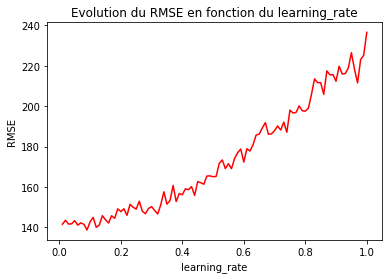

In [213]:
plt.plot(list_learning_rate, list_rmse, color='r')
plt.title("Evolution du RMSE en fonction du learning_rate")
plt.ylabel("RMSE")
plt.xlabel("learning_rate")
plt.show()

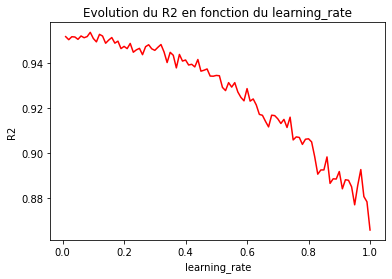

In [214]:
plt.plot(list_learning_rate, list_r2, color='r')
plt.title("Evolution du R2 en fonction du learning_rate")
plt.ylabel("R2")
plt.xlabel("learning_rate")
plt.show()

On peut voir clairement que le learning_rate influe enormement sur le surapprentissage du modèle

In [60]:
r2_lgb, rmse_lgb = LGB(0.08,3600,100)

[1]	valid_0's rmse: 604.031	valid_0's l2: 364853
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 565.775	valid_0's l2: 320101
[3]	valid_0's rmse: 529.541	valid_0's l2: 280413
[4]	valid_0's rmse: 498.176	valid_0's l2: 248179
[5]	valid_0's rmse: 467.96	valid_0's l2: 218986
[6]	valid_0's rmse: 441.316	valid_0's l2: 194760
[7]	valid_0's rmse: 415.763	valid_0's l2: 172859
[8]	valid_0's rmse: 393.815	valid_0's l2: 155090
[9]	valid_0's rmse: 372.576	valid_0's l2: 138813
[10]	valid_0's rmse: 353.509	valid_0's l2: 124968
[11]	valid_0's rmse: 335.938	valid_0's l2: 112854
[12]	valid_0's rmse: 320.483	valid_0's l2: 102710
[13]	valid_0's rmse: 306.48	valid_0's l2: 93929.8
[14]	valid_0's rmse: 294.127	valid_0's l2: 86510.9
[15]	valid_0's rmse: 282.003	valid_0's l2: 79525.8
[16]	valid_0's rmse: 270.874	valid_0's l2: 73372.5
[17]	valid_0's rmse: 261.987	valid_0's l2: 68637
[18]	valid_0's rmse: 253.283	valid_0's l2: 64152.3
[19]	valid_0's rmse: 246.542	valid_0's l2: 607

[202]	valid_0's rmse: 143.254	valid_0's l2: 20521.8
[203]	valid_0's rmse: 143.228	valid_0's l2: 20514.1
[204]	valid_0's rmse: 143.205	valid_0's l2: 20507.7
[205]	valid_0's rmse: 143.159	valid_0's l2: 20494.4
[206]	valid_0's rmse: 143.155	valid_0's l2: 20493.3
[207]	valid_0's rmse: 143.156	valid_0's l2: 20493.6
[208]	valid_0's rmse: 143.104	valid_0's l2: 20478.8
[209]	valid_0's rmse: 143.087	valid_0's l2: 20473.9
[210]	valid_0's rmse: 143.075	valid_0's l2: 20470.4
[211]	valid_0's rmse: 143.064	valid_0's l2: 20467.2
[212]	valid_0's rmse: 142.946	valid_0's l2: 20433.7
[213]	valid_0's rmse: 142.941	valid_0's l2: 20432
[214]	valid_0's rmse: 142.92	valid_0's l2: 20426
[215]	valid_0's rmse: 142.896	valid_0's l2: 20419.3
[216]	valid_0's rmse: 142.886	valid_0's l2: 20416.5
[217]	valid_0's rmse: 142.922	valid_0's l2: 20426.7
[218]	valid_0's rmse: 142.919	valid_0's l2: 20425.8
[219]	valid_0's rmse: 142.895	valid_0's l2: 20419
[220]	valid_0's rmse: 142.872	valid_0's l2: 20412.5
[221]	valid_0's rms

In [61]:
print("Nous avons comme RMSE : " + str(rmse_lgb) + " et comme R2 : " + str(r2_lgb))

Nous avons comme RMSE : 141.45932566558147 et comme R2 : 0.9519718672420505


## XGBoost

XGBoost est le deuxième algorithme de boosting que nous allons essayé, il est connu pour être l'un des plus efficace et flexible. Cependant le temps de traitement et la mémoire demandée reste plus élevé.

In [63]:
#installation de la bibliothèque
#!pip install xgboost

In [64]:
import xgboost as xgb
boost_params = {'eval_metric': 'rmse'}
model_xgboost = xgb.XGBRegressor(max_depth=10,
                                 learning_rate=0.1,
                                 n_estimators=1500,
                                 objective='reg:squarederror',
                                 gamma=0,
                                 min_child_weight=1,
                                 subsample=1,
                                 colsample_bytree=1,
                                 scale_pos_weight=1,
                                 seed=42,
                                 **boost_params)
model_xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
#Prediction et calcul du R2 et RMSE
y_test_predict = model_xgboost.predict(X_test)
rmse_xgboost = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_xgboost = r2_score(y_test, y_test_predict)
print("Nous avons comme RMSE : " + str(rmse_xgboost) + " et comme R2 : " + str(r2_xgboost))

Nous avons comme RMSE : 152.93938387140994 et comme R2 : 0.9438601551579718


Améliorons le modèle en changeant les paramètres :

In [99]:
import xgboost as xgb
boost_params = {'eval_metric': 'rmse'}
model_xgboost = xgb.XGBRegressor(max_depth=6,
                                 learning_rate=0.18,
                                 n_estimators=5000,
                                 objective='reg:squarederror',
                                 gamma=0,
                                 min_child_weight=1,
                                 subsample=1,
                                 colsample_bytree=1,
                                 scale_pos_weight=1,
                                 seed=42,
                                 **boost_params)
model_xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.18, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
#Prediction et calcul du R2 et RMSE
y_test_predict = model_xgboost.predict(X_test)
rmse_xgboost = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_xgboost = max(cross_val_score(model_xgboost, X_test, y_test, scoring='r2', cv=20))
print("Nous avons comme RMSE : " + str(rmse_xgboost) + " et comme R2 : " + str(r2_xgboost))

Nous avons comme RMSE : 146.41369182541035 et comme R2 : 0.9494522649478416


## CatBoost

CatBoost est le dernier algorithme de boosting que nous allons essayé, il est connu pour être plus performant que xgboost sur des données plus petites.Cependant le temps de traitement est très elevé. Il est arrivé très recemment en 2017. 

In [171]:
#Création des pools d'entrainement et de test à partir de nos données
from catboost import Pool, CatBoostRegressor

train_dataset = Pool(data=X_train,
                     label=y_train)

test_dataset = Pool(data=X_test,
                    label=y_test)

In [172]:
#Ayant un temps de traitement élevé, nous avons modifier les paramètres à la main 
#car les boucles de plus de 2 for était vraiment vraiment longue

# Initialisation de CatBoostClassifier
model_CatBoost = CatBoostRegressor(iterations=7000,
                          learning_rate=0.08,
                          depth=10,
                          eval_metric='R2',
                          random_seed = 42,
                          bagging_temperature = 0.6,
                          random_strength = 0.6 ,
                          od_type='Iter',
                          metric_period = 300,
                          od_wait=150,
                          use_best_model=True)

# Entraine les modèles et garde le meilleur modele
model_CatBoost.fit(train_dataset,eval_set=test_dataset,use_best_model=True)

0:	learn: 0.1113308	test: 0.1142352	best: 0.1142352 (0)	total: 20.7ms	remaining: 2m 24s
300:	learn: 0.9871100	test: 0.9614962	best: 0.9614962 (300)	total: 5.39s	remaining: 1m 59s
600:	learn: 0.9957483	test: 0.9660206	best: 0.9660365 (599)	total: 10.7s	remaining: 1m 53s
900:	learn: 0.9981325	test: 0.9672931	best: 0.9672937 (899)	total: 16s	remaining: 1m 48s
1200:	learn: 0.9990816	test: 0.9677547	best: 0.9677547 (1200)	total: 21.4s	remaining: 1m 43s
1500:	learn: 0.9995023	test: 0.9680017	best: 0.9680020 (1498)	total: 26.8s	remaining: 1m 38s
1800:	learn: 0.9997215	test: 0.9681505	best: 0.9681505 (1800)	total: 32.1s	remaining: 1m 32s
2100:	learn: 0.9998350	test: 0.9682221	best: 0.9682256 (2088)	total: 37.5s	remaining: 1m 27s
2400:	learn: 0.9999004	test: 0.9682917	best: 0.9682931 (2396)	total: 42.9s	remaining: 1m 22s
2700:	learn: 0.9999387	test: 0.9683549	best: 0.9683554 (2699)	total: 48.2s	remaining: 1m 16s
3000:	learn: 0.9999619	test: 0.9683918	best: 0.9683918 (2953)	total: 53.6s	remainin

In [197]:
from sklearn.metrics import mean_squared_error

#Prediction et calcul du R2 et RMSE
y_test_predict = model_CatBoost.predict(X_test)
rmse_catboost = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_catboost = r2_score(y_test, y_test_predict)
print("Nous avons comme RMSE : " + str(rmse_catboost) + " et comme R2 : " + str(r2_catboost))

Nous avons comme RMSE : 115.14618248687601 et comme R2 : 0.9684588080933272


Conclusion Catboost est l'algorithme de boosting nous offrant le meilleur score, cela n'est pas étonnant car il converge plus rapidement sur des meilleurs résultats avec des données moins conséquentes.

## Conclusion sur les modèles

Text(0.5, 0, 'Algorithme utilisé')

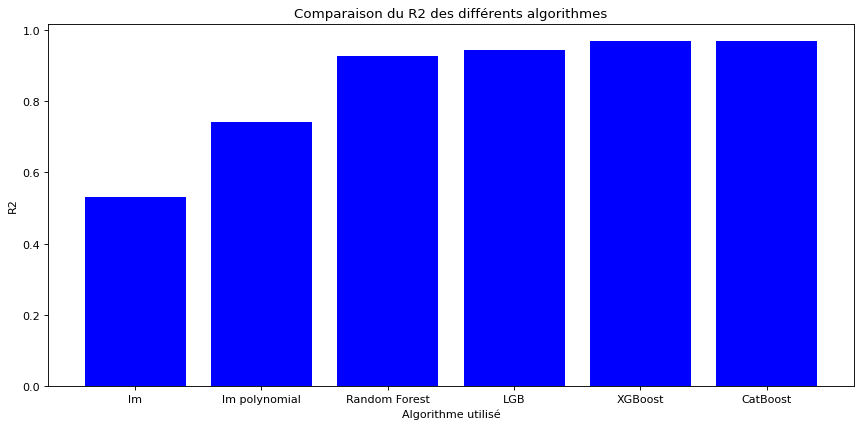

In [216]:
from matplotlib.pyplot import figure

list_model_r2 = [r2_reg_simple,r2_reg_polynomiale,r2_svm,r2_lgb,r2_xgboost,r2_catboost]
list_model_nom = ["lm","lm polynomial","Random Forest","LGB","XGBoost","CatBoost"]

figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list_model_nom, list_model_r2, color='b')
plt.title("Comparaison du R2 des différents algorithmes")
plt.ylabel("R2")
plt.xlabel("Algorithme utilisé")

Pour répondre à cette problématiques de regression linéaire supervisé, nous avons utilisé différent algorithme afin d'étudier dans un premier temps d'étudier ceux-ci et également dans l'optique d'améliorer nos prédictions afin d'obtenir le meilleur modèle pour notre API. Ci-dessus on peut la comparaison entre les différents résultats que nous avons pu avoir.
On remarque une domination des algorithmes de boosting parmis les meilleurs résultats. En l'occurence CatBoost est celui ayant retourner les meilleures prédictions, cela s'explique en grande partie par le fait qu'il fit très rapidement par rapport à ses oncurrents sur des données moins abondante.

# Enregistement du meilleur modèle

Afin de rendre disponible notre modèle sous forme d'API, nous enregistrons notre meilleur modèle cest à dire le modèle basé sur CatBoost

In [189]:
model_CatBoost.save_model("modele_catboost.cbm",format="cbm")

# Conclusion Globale sur cette étude

Pour conclure, sur ce projet nous avons pu nous mettre à la place d'un data scientist confronté à un jeu de données inconnu. On a ainsi pu analyser la problèmatique et les données fournies pour essayer d'y répondre. A la suite de cette analyse, nous avons pu dégager des colonnes interessantes pour la création des modèles. Ceux-ci ont nécessité beaucoup de travail de notre part afin de trouver le meilleur. Nous sommes ravi d'avoir pu étudier et mettre en pratique les différents aspects d'une étude.

# Bonus : Participation concours Kaggle

En regardant notre dataset sur internet, nous sommes tombé sur un concours kaggle lié (https://www.kaggle.com/c/seoul-bike-rental-prediction/overview). Celui-ci n'a pas eu beaucoup de participant et aucune personne n'a fait d'étude poussée dessus. Nous avons vu que nous pouvions toujours participer à ce concours. Nous avons alors décidé de participer pour tester notre modèle.

Ce concours se base sur le r2 comme évalutation. Il faut soumettre un fichier csv avec comme colonne :
- id_test
- nombre de vélos loués

In [193]:
#Lecture du dataset
import pandas as pd
df_train = pd.read_csv("data_concours/train.csv")
df_test = pd.read_csv("data_concours/test.csv")

In [194]:
#Transformation des données pour notre modèle

#train
df_train["Date"] = pd.to_datetime(df_train["Date"],dayfirst=True)
df_train["Year"] = df_train["Date"].apply(lambda x: x.year)
df_train["Month"] = df_train["Date"].apply(lambda x: x.month)
df_train["Day"] = df_train["Date"].apply(lambda x: x.day)
df_train["DayOfWeek"] = df_train["Date"].dt.dayofweek
df_train["isWeekEnd"] = [True if int(x)>4 else False for x in df_train["DayOfWeek"]]
mapping = {k: v for v, k in enumerate(df_train["Season"].unique())}
df_train['Season'] = df_train["Season"].map(mapping)
df_train = df_train.drop('Date', 1)

#test
df_test["Date"] = pd.to_datetime(df_test["Date"],dayfirst=True)
df_test["Year"] = df_test["Date"].apply(lambda x: x.year)
df_test["Month"] = df_test["Date"].apply(lambda x: x.month)
df_test["Day"] = df_test["Date"].apply(lambda x: x.day)
df_test["DayOfWeek"] = df_test["Date"].dt.dayofweek
df_test["isWeekEnd"] = [True if int(x)>4 else False for x in df_test["DayOfWeek"]]
mapping = {k: v for v, k in enumerate(df_test["Season"].unique())}
df_test['Season'] = df_test["Season"].map(mapping)
df_test = df_test.drop('Date', 1)

#Séparation en train validation
from sklearn.model_selection import train_test_split
y = df_train.pop('Bikes_Rented')
X = df_train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [195]:
#Utilisation de notre modèle
from catboost import Pool, CatBoostRegressor

train_dataset = Pool(data=X_train,
                     label=y_train)

test_dataset = Pool(data=X_test,
                    label=y_test)

# Initialisation de CatBoostClassifier
model_CatBoost = CatBoostRegressor(iterations=7000,
                          learning_rate=0.08,
                          depth=10,
                          eval_metric='R2',
                          random_seed = 42,
                          bagging_temperature = 0.6,
                          random_strength = 0.6 ,
                          od_type='Iter',
                          metric_period = 1000,
                          od_wait=150,
                          use_best_model=True)

# Entraine les modèles et garde le meilleur modele
model_CatBoost.fit(train_dataset,eval_set=test_dataset,use_best_model=True)

0:	learn: 0.1113308	test: 0.1142352	best: 0.1142352 (0)	total: 23.7ms	remaining: 2m 45s
1000:	learn: 0.9985358	test: 0.9674891	best: 0.9674937 (999)	total: 21.4s	remaining: 2m 8s
2000:	learn: 0.9998056	test: 0.9682099	best: 0.9682121 (1999)	total: 43.9s	remaining: 1m 49s
3000:	learn: 0.9999619	test: 0.9683918	best: 0.9683918 (2953)	total: 1m 9s	remaining: 1m 32s
4000:	learn: 0.9999909	test: 0.9684409	best: 0.9684409 (4000)	total: 1m 37s	remaining: 1m 13s
5000:	learn: 0.9999976	test: 0.9684504	best: 0.9684512 (4951)	total: 2m 2s	remaining: 49s
6000:	learn: 0.9999993	test: 0.9684582	best: 0.9684584 (5952)	total: 2m 28s	remaining: 24.8s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9684588081
bestIteration = 6049

Shrink model to first 6050 iterations.


In [196]:
#Creation du dataset à rendre
y_test_predict = model_CatBoost.predict(df_test)

sample_submission = pd.DataFrame(data=df_test["Id"])
sample_submission["Bikes_Rented"] = y_test_predict.astype(int)

sample_submission.to_csv('sample_submission.csv',encoding='utf-8',index=False)

Après upload sur le concours kaggle, nous avons obtenu un R2 de : (cf : resultat_concours_kaggle.png)
- Private Score : 0.93549
- Public Score : 0.94942

Ce qui nous place sur la première place du concours (de 10 participants) qui a eu lieu, il y a 5 mois.

**On en conclut donc que notre modèle est performant par rapport à la problématique demandée**